recreating fig 2 from 2021 Palmer et al. paper
https://www.pnas.org/doi/abs/10.1073/pnas.2114326118?url_ver=Z39.88-2003&rfr_id=ori%3Arid%3Acrossref.org&rfr_dat=cr_pub++0pubmed

In [2]:
library(Seurat)
library(ggplot2)
library(viridis)
library(ComplexHeatmap)
library(circlize)
library(scCustomize)
library(Rfast)
library(reshape2)
library(stringr)

In [3]:
sobj <- readRDS("/tscc/projects/ps-epigen/users/kdang/ASAP/rds_objs/aging_merged_processed_v3_wwn_nodoub_v2_batch_cpeaks_batch_finalishWNN_frozenVersion_macs3peaks_chromvar_noATACassay.rds")

In [4]:
# add in metacol with celltype and condition combined bc split.by in dotplot removes the average expression from legend
sobj$ct_cond <- paste0(sobj$broad_celltypes, "_", sobj$conditions)

head(sobj@meta.data)

Loading required package: Signac



orig.ident              nCount_RNA
QY_2139_1_2_QY_2138_1_2_TACTGCACAACACCTA-1 QY_2139_1_2_QY_2138_1_2 29900     
QY_2139_1_2_QY_2138_1_2_CAACCCGCACAAACTT-1 QY_2139_1_2_QY_2138_1_2 28031     
QY_2139_1_2_QY_2138_1_2_TTAGACTCACCACAAC-1 QY_2139_1_2_QY_2138_1_2 27880     
QY_2139_1_2_QY_2138_1_2_TCATAACCATCAGCAC-1 QY_2139_1_2_QY_2138_1_2 26613     
QY_2139_1_2_QY_2138_1_2_TGACTCCTCGCTAGCA-1 QY_2139_1_2_QY_2138_1_2 26487     
QY_2139_1_2_QY_2138_1_2_AAAGCTTGTCATCCTG-1 QY_2139_1_2_QY_2138_1_2 26364     
                                           nFeature_RNA nCount_ATAC
QY_2139_1_2_QY_2138_1_2_TACTGCACAACACCTA-1 6204         26824      
QY_2139_1_2_QY_2138_1_2_CAACCCGCACAAACTT-1 6003         17321      
QY_2139_1_2_QY_2138_1_2_TTAGACTCACCACAAC-1 6175         13896      
QY_2139_1_2_QY_2138_1_2_TCATAACCATCAGCAC-1 5747         47180      
QY_2139_1_2_QY_2138_1_2_TGACTCCTCGCTAGCA-1 6150         57216      
QY_2139_1_2_QY_2138_1_2_AAAGCTTGTCATCCTG-1 6024         38509      
                                           nFeature_ATAC percent.mt nCount_SCT
QY_2139_1_2_QY_2138_1_2_TACTGCACAACACCTA-1 11160         0.70903010 4210      
QY_2139_1_2_QY_2138_1_2_CAACCCGCACAAACTT-1  8077         0.30323570 4246      
QY_2139_1_2_QY_2138_1_2_TTAGACTCACCACAAC-1  6636         0.21162123 4233      
QY_2139_1_2_QY_2138_1_2_TCATAACCATCAGCAC-1 19500         0.09769661 4254      
QY_2139_1_2_QY_2138_1_2_TGACTCCTCGCTAGCA-1 23439         0.92498207 4272      
QY_2139_1_2_QY_2138_1_2_AAAGCTTGTCATCCTG-1 16232         0.25034137 4361      
                                           nFeature_SCT nCount_ATAC_COMB
QY_2139_1_2_QY_2138_1_2_TACTGCACAACACCTA-1 2107         17090           
QY_2139_1_2_QY_2138_1_2_CAACCCGCACAAACTT-1 2117         11269           
QY_2139_1_2_QY_2138_1_2_TTAGACTCACCACAAC-1 2121          9156           
QY_2139_1_2_QY_2138_1_2_TCATAACCATCAGCAC-1 2081         32827           
QY_2139_1_2_QY_2138_1_2_TGACTCCTCGCTAGCA-1 2141         41919           
QY_2139_1_2_QY_2138_1_2_AAAGCTTGTCATCCTG-1 2219         27086           
                                           nFeature_ATAC_COMB ⋯
QY_2139_1_2_QY_2138_1_2_TACTGCACAACACCTA-1 13408              ⋯
QY_2139_1_2_QY_2138_1_2_CAACCCGCACAAACTT-1  9849              ⋯
QY_2139_1_2_QY_2138_1_2_TTAGACTCACCACAAC-1  8029              ⋯
QY_2139_1_2_QY_2138_1_2_TCATAACCATCAGCAC-1 25276              ⋯
QY_2139_1_2_QY_2138_1_2_TGACTCCTCGCTAGCA-1 31492              ⋯
QY_2139_1_2_QY_2138_1_2_AAAGCTTGTCATCCTG-1 21090              ⋯
                                           cpeaks_snn_res.1.2 cpeaks.weight
QY_2139_1_2_QY_2138_1_2_TACTGCACAACACCTA-1 3                  0.4232354    
QY_2139_1_2_QY_2138_1_2_CAACCCGCACAAACTT-1 20                 0.4709096    
QY_2139_1_2_QY_2138_1_2_TTAGACTCACCACAAC-1 5                  0.3567048    
QY_2139_1_2_QY_2138_1_2_TCATAACCATCAGCAC-1 14                 0.3389017    
QY_2139_1_2_QY_2138_1_2_TGACTCCTCGCTAGCA-1 42                 0.5711914    
QY_2139_1_2_QY_2138_1_2_AAAGCTTGTCATCCTG-1 26                 0.4561977    
                                           broad_celltypes
QY_2139_1_2_QY_2138_1_2_TACTGCACAACACCTA-1 GABAergic      
QY_2139_1_2_QY_2138_1_2_CAACCCGCACAAACTT-1 GABAergic      
QY_2139_1_2_QY_2138_1_2_TTAGACTCACCACAAC-1 GABAergic      
QY_2139_1_2_QY_2138_1_2_TCATAACCATCAGCAC-1 GABAergic      
QY_2139_1_2_QY_2138_1_2_TGACTCCTCGCTAGCA-1 Glutamatergic  
QY_2139_1_2_QY_2138_1_2_AAAGCTTGTCATCCTG-1 GABAergic      
                                           sub_celltypes                
QY_2139_1_2_QY_2138_1_2_TACTGCACAACACCTA-1 GABAergic_NDB-SI-MA-STRv_Lhx8
QY_2139_1_2_QY_2138_1_2_CAACCCGCACAAACTT-1 GABAergic_STR_D1_Sema5a      
QY_2139_1_2_QY_2138_1_2_TTAGACTCACCACAAC-1 GABAergic_Pvpo-VMPO-MPN_Hmx2 
QY_2139_1_2_QY_2138_1_2_TCATAACCATCAGCAC-1 GABAergic_LSX_Prdm12_Slit2   
QY_2139_1_2_QY_2138_1_2_TGACTCCTCGCTAGCA-1 Glutamatergic_RE-Xi_Nox4     
QY_2139_1_2_QY_2138_1_2_AAAGCTTGTCATCCTG-1 GABAergic_Vip                
                                           sub_cellty

In [5]:
sobj_nodoub <- subset(sobj, subset = broad_celltypes == "Doublet", invert = TRUE)

In [6]:
sobj
colnames(sobj@meta.data)
unique(sobj$broad_celltypes)

sobj_nodoub
colnames(sobj_nodoub@meta.data)

An object of class Seurat 
975987 features across 91091 samples within 5 assays 
Active assay: cpeaks (478426 features, 478426 variable features)
 2 layers present: counts, data
 4 other assays present: RNA, SCT, macs3_peaks, chromvar
 9 dimensional reductions calculated: pca, harmony, umap, harmony.rna, umap.hrm.rna, lsi, harmony.atac, umap.hrm.atac, umap.hrm.wnn

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "nCount_ATAC"           "nFeature_ATAC"         "percent.mt"           
 [7] "nCount_SCT"            "nFeature_SCT"          "nCount_ATAC_COMB"     
[10] "nFeature_ATAC_COMB"    "SCT_snn_res.0.5"       "seurat_clusters"      
[13] "conditions"            "SCT_snn_res.0.05"      "TSS.enrichment"       
[16] "TSS.percentile"        "DF.classification"     "DF.scores"            
[19] "age"                   "genotype"              "blacklist_fraction"   
[22] "SCT_snn_res.1.2"       "ATAC_snn_res.1.2"      "SCT.weight"           
[25] "ATAC.weight"           "wsnn_res.1.2"          "qn.DF.scores"         
[28] "ATAC_COMB_snn_res.1.2" "ATAC_COMB.weight"      "nCount_cpeaks"        
[31] "nFeature_cpeaks"       "cpeaks_snn_res.1.2"    "cpeaks.weight"        
[34] "broad_celltypes"       "sub_celltypes"         "sub_celltypes_v2"     
[37] "frozenBatch"           "nCount_macs3_peaks"    "nFeature_macs3_peaks" 
[40] "replicates"            "ct_cond"

[1] GABAergic       Glutamatergic   BFCN            OPC            
[5] Doublet         Oligodendrocyte Astrocyte       Microglia      
8 Levels: Astrocyte Microglia Oligodendrocyte OPC BFCN ... Doublet

An object of class Seurat 
975987 features across 89812 samples within 5 assays 
Active assay: cpeaks (478426 features, 478426 variable features)
 2 layers present: counts, data
 4 other assays present: RNA, SCT, macs3_peaks, chromvar
 9 dimensional reductions calculated: pca, harmony, umap, harmony.rna, umap.hrm.rna, lsi, harmony.atac, umap.hrm.atac, umap.hrm.wnn

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "nCount_ATAC"           "nFeature_ATAC"         "percent.mt"           
 [7] "nCount_SCT"            "nFeature_SCT"          "nCount_ATAC_COMB"     
[10] "nFeature_ATAC_COMB"    "SCT_snn_res.0.5"       "seurat_clusters"      
[13] "conditions"            "SCT_snn_res.0.05"      "TSS.enrichment"       
[16] "TSS.percentile"        "DF.classification"     "DF.scores"            
[19] "age"                   "genotype"              "blacklist_fraction"   
[22] "SCT_snn_res.1.2"       "ATAC_snn_res.1.2"      "SCT.weight"           
[25] "ATAC.weight"           "wsnn_res.1.2"          "qn.DF.scores"         
[28] "ATAC_COMB_snn_res.1.2" "ATAC_COMB.weight"      "nCount_cpeaks"        
[31] "nFeature_cpeaks"       "cpeaks_snn_res.1.2"    "cpeaks.weight"        
[34] "broad_celltypes"       "sub_celltypes"         "sub_celltypes_v2"     
[37] "frozenBatch"           "nCount_macs3_peaks"    "nFeature_macs3_peaks" 
[40] "replicates"            "ct_cond"

# fig 2b - heatmap

In [7]:
# fig 2b - heatmap
# for the heatmap (x-axis = broad CT; y-axis = Tri16 genes)
# foldchange heatmap; for significance use "*" for padj
# apply a % avg exp cutoff (N%)
tri16Genes <- read.table("/tscc/projects/ps-epigen/users/kdang/ASAP/ifiles/trisomicGenes.txt")$V1
tri16Genes

# deseq path
#DE_PATH <- "/tscc/projects/ps-epigen/users/kdang/ASAP/Aging_Figures/Aging_WWN_nodoub/DESeq_OUT/DESeq_byBroadCTs/DESeq_out/"
DE_PATH <- "/tscc/projects/ps-epigen/users/kdang/ASAP/Aging_Figures/Aging_WWN_nodoub/DESeq_OUT/DESeq_byBroadCTs/DESeq_out_withNA/"

HMAP_ODIR <- "/tscc/projects/ps-epigen/users/kdang/ASAP/Aging_Figures/Aging_WWN_nodoub/generalFigures/deseq_tri16_FChmaps/"
# before you start looping check if i can add the signif "*" - update i couldnt figure it out so im just gonna do it manually

[1] "Lipi"           "Rbm11"          "Hspa13"         "Samsn1"        
  [5] "Nrip1"          "Usp25"          "mmu-miR-99a"    "mmu-let-7c-1"  
  [9] "mmu-miR-125b-2" "Cxadr"          "Btg3"           "D16Ertd472e"   
 [13] "Chodl"          "Prss7"          "Ncam2"          "mmu-miR-155"   
 [17] "Mrpl39"         "Jam2"           "Atp5j"          "Gabpa"         
 [21] "App"            "Cyyr1"          "Adamts1"        "Adamts5"       
 [25] "N6amt1"         "Zfp294"         "Rwdd2b"         "Usp16"         
 [29] "Cct8"           "Orf63"          "Bach1"          "Grik1"         
 [33] "Cldn17"         "Cldn8"          "Gm312"          "Krtap26-1"     
 [37] "Krtap13-1"      "Krtap13"        "Krtap16"        "Krtap16-7"     
 [41] "Krtap8-1"       "Tiam1"          "Krtap16-4"      "Krtap8-2"      
 [45] "Sod1"           "Sfrs15"         "Hunk"           "2610039C10Rik" 
 [49] "Mrap"           "Urb1"           "4931408A02Rik"  "1110004E09Rik" 
 [53] "Synj1"          "1810007M14Rik"  "4932438H23Rik"  "Olig2"         
 [57] "Olig1"          "Ifnar2"         "Il10rb"         "Ifnar1"        
 [61] "Ifngr2"         "Tmem50b"        "Dnajc28"        "Gart"          
 [65] "Son"            "Donson"         "Atp5o"          "Cryzl1"        
 [69] "Itsn1"          "Mrps6"          "Slc5a3"         "Kcne2"         
 [73] "4930563D23Rik"  "Kcne1"          "Rcan1"          "Clic6"         
 [77] "Runx1"          "mmu-miR-802"    "Setd4"          "Cbr1"          
 [81] "Cbr3"           "Dopey2"         "Morc3"          "Chaf1b"        
 [85] "Cldn14"         "Sim2"           "Hlcs"           "Ripply3"       
 [89] "Pigp"           "Ttc3"           "Dscr3"          "Dyrk1a"        
 [93] "Kcnj6"          "Kcnj15"         "Erg"            "Ets2"          
 [97] "Psmg1"          "Brwd1"          "Hmgn1"          "Wrb"           
[101] "Lca5l"          "Sh3bgr"         "B3galt5"        "Igsf5"         
[105] "Itgb2l"         "Dscam"          "Bace2"          "Fam3b"         
[109] "Mx2"            "Tmprss2"        "Ripk4"          "Prdm15"        
[113] "5830404H04Rik"  "Zfp295"

### testing

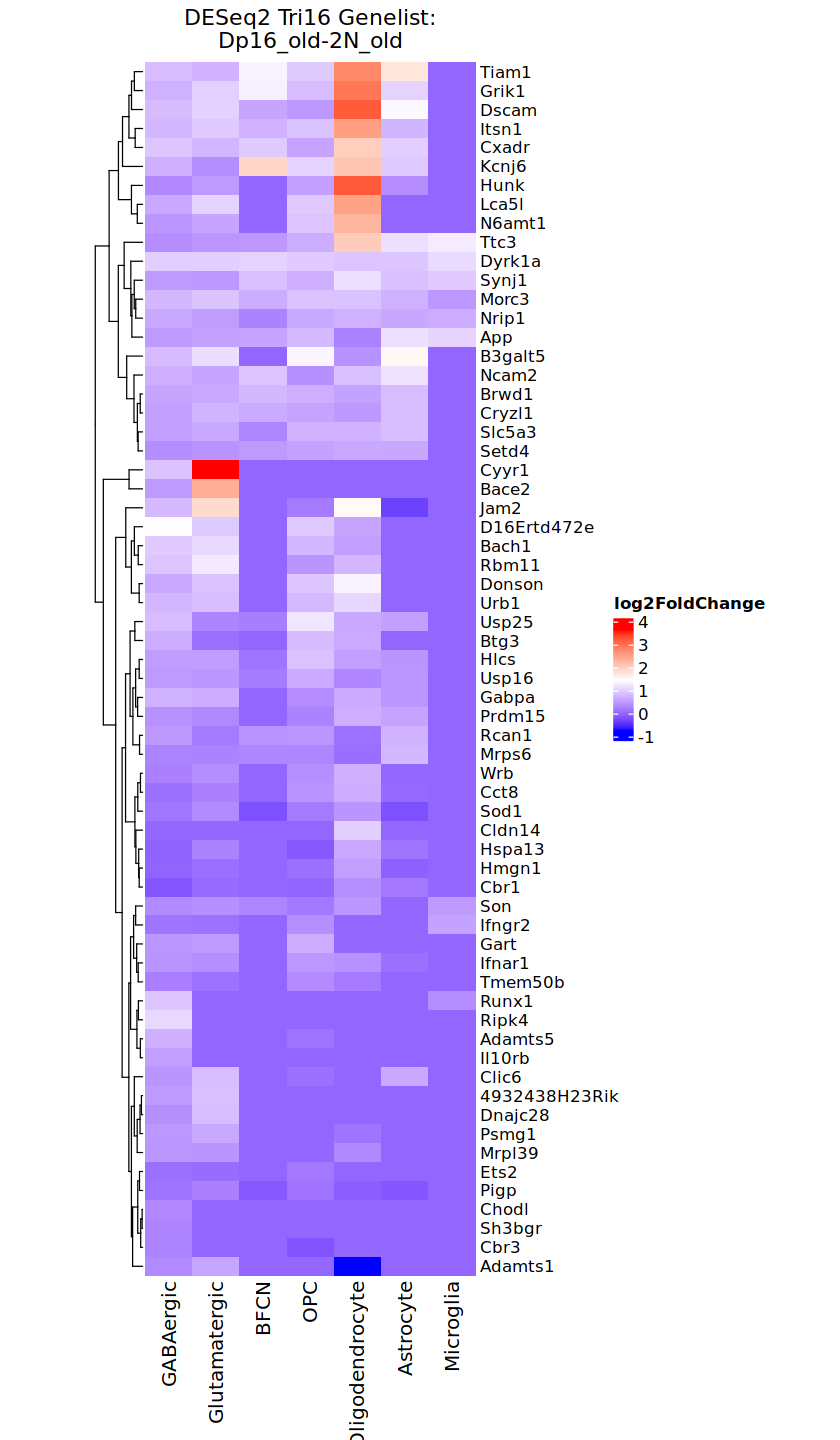

In [31]:
options(repr.plot.height = 12, repr.plot.width = 7)
f1 <- colorRamp2(seq(min(plotMtx), max(plotMtx), length = 3), c("blue", "white", "red"))
ht <- Heatmap(as.matrix(plotMtx), name="log2FoldChange", column_title = paste0("DESeq2 Tri16 Genelist:\n", pairwise),
              show_row_names = TRUE, row_names_side = "right", col = f1, column_order = colnames(plotMtx),
              cluster_rows = TRUE, show_row_dend =TRUE, cluster_columns = FALSE, show_column_dend = FALSE,
              row_names_gp = gpar(fontsize = 10), width = ncol(plotMtx)*unit(10, "mm"))
ht <- draw(ht)

GABAergic  Glutamatergic BFCN      OPC        Oligodendrocyte Astrocyte
Rbm11   0.9048050 1.24378736    0.0000000  0.4415870 0.7653082       0.0000000
Hspa13 -0.0354950 0.26766886    0.0000000 -0.1321392 0.6330854       0.1238973
Nrip1   0.6270267 0.50906155    0.2739173  0.6349486 0.7153220       0.6186786
Usp25   0.8312173 0.28189889    0.2195635  1.2211080 0.6307620       0.5502641
Cxadr   0.9183107 0.76082137    0.9617281  0.5807306 2.0112661       0.9926490
Btg3    0.6778040 0.08080128    0.0000000  0.8150632 0.6471471       0.0000000
       Microglia
Rbm11  0.0000000
Hspa13 0.0000000
Nrip1  0.6714049
Usp25  0.0000000
Cxadr  0.0000000
Btg3   0.0000000

GABAergic   Glutamatergic BFCN       OPC         Oligodendrocyte
Rbm11   0.27237343 0.37441730    0.00000000  0.13293094 0.2303807      
Hspa13 -0.01068506 0.08057636    0.00000000 -0.03977785 0.1905777      
Nrip1   0.18875383 0.15324280    0.08245734  0.19113857 0.2153334      
Usp25   0.25022135 0.08486002    0.06609519  0.36759012 0.1898783      
Cxadr   0.27643906 0.22903005    0.28950900  0.17481732 0.6054514      
Btg3    0.20403934 0.02432361    0.00000000  0.24535846 0.1948107      
       Astrocyte Microglia
Rbm11  0.0000000 0.000000 
Hspa13 0.0372968 0.000000 
Nrip1  0.1862408 0.202113 
Usp25  0.1656460 0.000000 
Cxadr  0.2988171 0.000000 
Btg3   0.0000000 0.000000

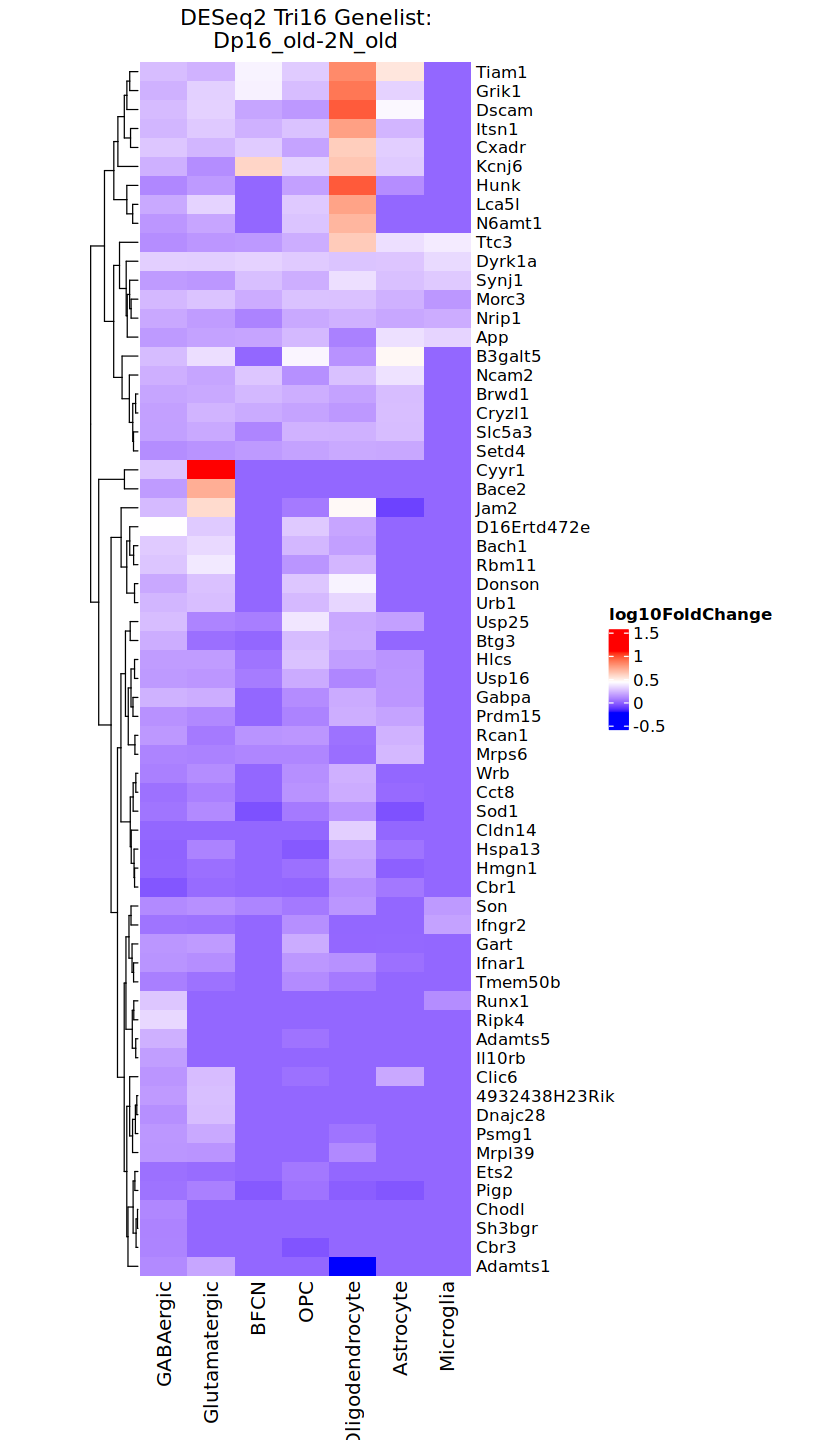

In [30]:
# above heatmap is smooshing the other vals with the super high log2FC's; try log10(FC)?
head(plotMtx)

plotMtx_log10 <- plotMtx / log2(10)
head(plotMtx_log10)

# TODO: CHANGE THIS TO 0 = WHITE
f1 <- colorRamp2(seq(min(plotMtx_log10), max(plotMtx_log10), length = 3), c("blue", "white", "red"))
ht <- Heatmap(as.matrix(plotMtx_log10), name="log10FoldChange", column_title = paste0("DESeq2 Tri16 Genelist:\n", pairwise),
              show_row_names = TRUE, row_names_side = "right", col = f1, column_order = colnames(plotMtx_log10),
              cluster_rows = TRUE, show_row_dend =TRUE, cluster_columns = FALSE, show_column_dend = FALSE,
              row_names_gp = gpar(fontsize = 10), width = ncol(plotMtx_log10)*unit(10, "mm"))
ht <- draw(ht)

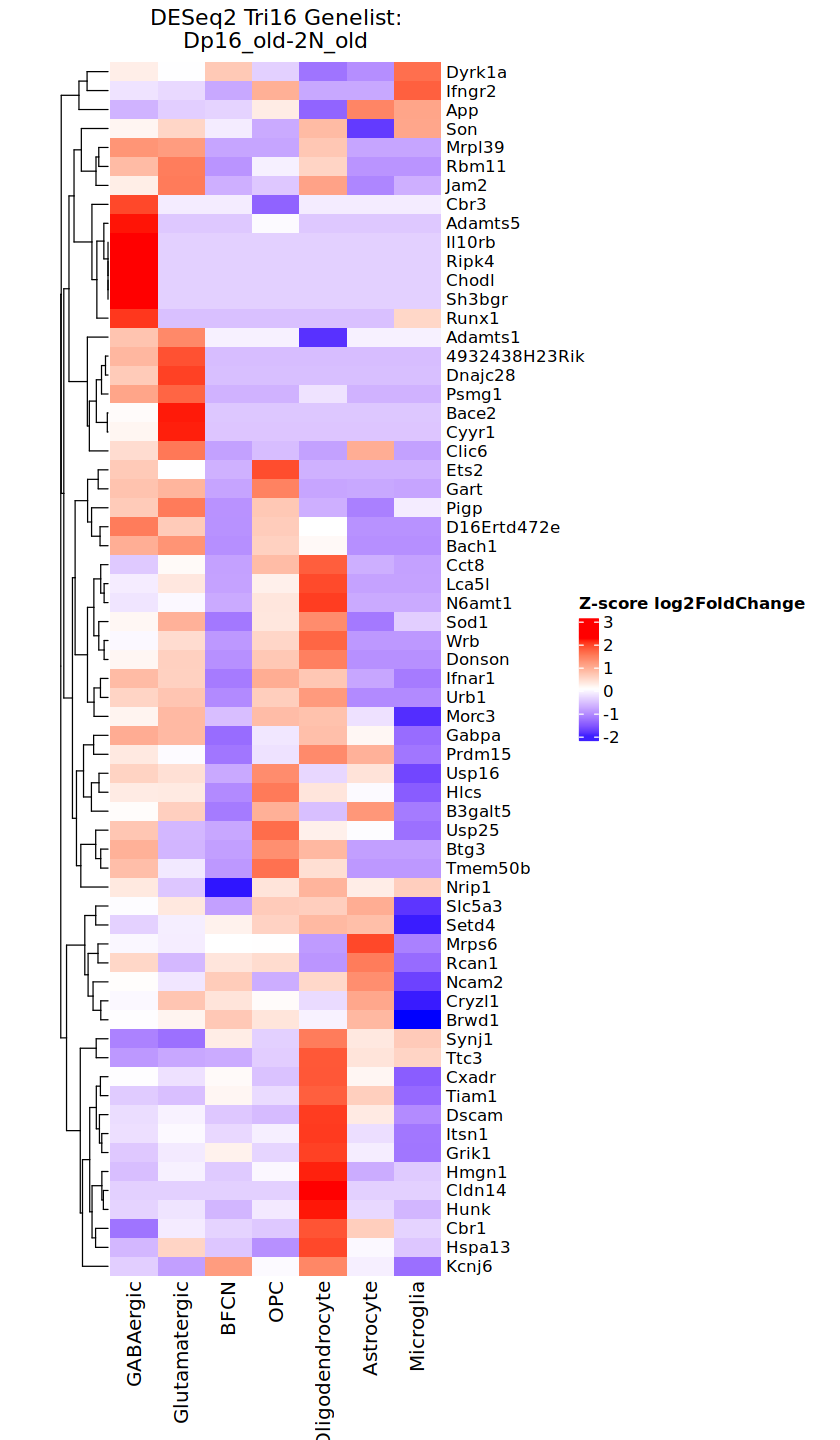

In [29]:
# try zscore
plotMtx_zsc <- t(scale(t(plotMtx)))

f1 <- colorRamp2(seq(min(plotMtx_zsc), max(plotMtx_zsc), length = 3), c("blue", "white", "red"))
ht <- Heatmap(as.matrix(plotMtx_zsc), name="Z-score log2FoldChange", column_title = paste0("DESeq2 Tri16 Genelist:\n", pairwise),
              show_row_names = TRUE, row_names_side = "right", col = f1, column_order = colnames(plotMtx_zsc),
              cluster_rows = TRUE, show_row_dend =TRUE, cluster_columns = FALSE, show_column_dend = FALSE,
              row_names_gp = gpar(fontsize = 10), width = ncol(plotMtx_zsc)*unit(10, "mm"))
ht <- draw(ht)

### right now it's just different ways of plotting logFC's apply the pct exp cutoff N% (@ least 1 broadCT must exp gene by N%)

In [8]:
DefaultAssay(sobj) <- "RNA"

In [9]:
pctExp <- Percent_Expressing(sobj, features = tri16Genes, group_by = "broad_celltypes")
pctExp

Warning message:
“The following features were omitted as they were not found:
ℹ mmu-miR-99a, mmu-let-7c-1, mmu-miR-125b-2, Prss7, mmu-miR-155, Zfp294, Orf63,
  Gm312, Krtap16, Krtap16-7, Krtap16-4, Krtap8-2, Sfrs15, 2610039C10Rik,
  4931408A02Rik, 1110004E09Rik, 1810007M14Rik, 4930563D23Rik, mmu-miR-802,
  Dopey2, Dscr3, Mx2, 5830404H04Rik, and Zfp295”


GABAergic    Glutamatergic BFCN     OPC        Doublet    
Lipi         0.045051810  0.13425822    0.15625  0.0000000  0.07818608
Rbm11        5.684870935  6.31013650   19.06250  7.3637703  5.08209539
Hspa13      13.639018204 16.17811591   22.34375 12.6165930 10.71149335
Samsn1       0.320368424  0.71604386    1.25000  0.3436426  6.33307271
Nrip1       23.236722231 27.38867756   62.81250 21.8949435 34.40187647
Usp25       29.585690210 38.28597002   50.46875 24.5949926 26.58326818
Cxadr       26.480452520 32.13246811   36.40625 18.9494354 19.07740422
Btg3        11.720144833 12.27343925   12.96875  7.8055965  7.97498045
D16Ertd472e  2.491198211  4.02774670    1.71875  4.4182622  5.47302580
Chodl        1.957250838  1.29782949    0.46875  0.9327442  0.93823299
Ncam2       70.671271963 85.19803088   77.65625 94.4526264 62.00156372
Mrpl39       6.912949892  8.50302081    9.68750  5.6455572  5.16028147
Jam2         3.670888188  5.28082345    3.59375 25.4295533  6.88037529
Atp5j       26.947656472 30.49899306   36.25000 21.6003927 20.56293980
Gabpa       12.921526422 15.05929738   17.18750 11.5856652 10.63330727
App         91.929051743 94.55135377   97.50000 68.5321551 78.81157154
Cyyr1        0.545627472  1.76773327    9.53125  0.3436426  0.93823299
Adamts1      0.892693264  2.31595435    0.78125  5.1055474  2.42376857
Adamts5      1.159666950  1.23070038    0.62500  6.2346588  0.86004691
N6amt1       9.250638234 10.41620049   10.62500  7.2655866  4.76935106
Rwdd2b       1.716974521  2.10337883    2.03125  1.7182131  1.25097733
Usp16       31.614690227 38.21884090   42.50000 31.5660285 23.76856919
Cct8        18.317732059 22.53300515   27.65625 14.7275405 13.60437842
Bach1        7.962490197 10.36025957   19.84375  8.0510555  9.61688819
Grik1       40.539954281 42.85074961   40.00000 52.5773196 34.48006255
Cldn17       0.001668586  0.00000000    0.00000  0.0000000  0.00000000
Cldn8        0.008342928  0.02237637    0.00000  0.0000000  0.00000000
Krtap26-1    0.000000000  0.00000000    0.15625  0.0000000  0.00000000
Krtap13-1    0.000000000  0.00000000    0.00000  0.0000000  0.00000000
Krtap13      0.000000000  0.00000000    0.00000  0.0000000  0.00000000
⋮           ⋮            ⋮             ⋮        ⋮          ⋮          
Cbr1        15.25754618  18.06891922   29.53125 12.6165930 11.10242377
Cbr3         5.11254609   1.82367420    5.00000  7.7565047  3.90930414
Morc3       23.09989822  28.41799060   39.84375 20.1767305 23.92494136
Chaf1b       0.10845806   0.12307004    0.31250  0.0490918  0.23455825
Cldn14       0.31202550   0.34683374    0.46875  1.0309278  1.17279124
Sim2         0.49890708   0.55940926    0.31250  0.1963672  0.23455825
Hlcs        37.80013682  41.86618930   48.75000 29.4550810 29.16340891
Ripply3      0.05840049   0.12307004    0.00000  0.0490918  0.07818608
Pigp        22.52590479  24.97202954   37.81250 18.6548846 19.15559030
Ttc3        96.26737415  97.66166928   98.59375 72.2140403 76.15324472
Dyrk1a      56.78363451  65.80890580   70.78125 46.1953854 45.73885848
Kcnj6       35.84288599  59.38688745   28.12500 16.8875798 24.78498827
Kcnj15       0.01501727   0.11188185    0.00000  0.0000000  0.00000000
Erg          0.28199096   0.25732826    0.46875  0.1963672  0.23455825
Ets2        20.94074853  21.50369210   10.93750 12.0765832 13.05707584
Psmg1        5.42790876   6.42201835    5.46875  4.4673540  4.61297889
Brwd1       64.74445612  71.52606847   78.28125 48.7972509 50.97732604
Hmgn1       21.11595001  22.26448870   25.46875 15.8075601 15.08991400
Wrb         15.00392118  18.12486015   19.84375 10.0638193 10.63330727
Lca5l       14.78533647  18.16961289   20.46875 10.2110947  9.92963253
Sh3bgr       0.74418915   0.87267845    2.03125  0.4909180  0.15637217
B3galt5     25.05381188  21.21279928   22.18750 14.2857143 21.81391712
Igsf5        0.24027632   0.19019915    2.50000  0.1963672  0.07818608
Itgb2l       0.01668586   0.02237637    0.31250  0.0000000  0.00000000
Dscam       67.47259348  92.15708212

In [10]:
head(pctExp)
dim(pctExp)

# remove genes that dont have pct exp in @ least 1 broadCT

keepgenes <- rownames(pctExp[apply(pctExp, 1, max) >= 10, ])
length(keepgenes)

GABAergic   Glutamatergic BFCN     OPC        Doublet    
Lipi    0.04505181  0.1342582     0.15625  0.0000000  0.07818608
Rbm11   5.68487093  6.3101365    19.06250  7.3637703  5.08209539
Hspa13 13.63901820 16.1781159    22.34375 12.6165930 10.71149335
Samsn1  0.32036842  0.7160439     1.25000  0.3436426  6.33307271
Nrip1  23.23672223 27.3886776    62.81250 21.8949435 34.40187647
Usp25  29.58569021 38.2859700    50.46875 24.5949926 26.58326818
       Oligodendrocyte Astrocyte   Microglia 
Lipi    0.00000000      0.03838772  0.0000000
Rbm11   1.06962664      1.84261036  0.1271456
Hspa13  1.68516650      8.00383877  1.5257470
Samsn1  0.02018163      0.32629559 11.3477432
Nrip1   9.67709384     18.11900192 39.0654800
Usp25  15.46922301     19.25143954 11.7927527

[1] 90  8

[1] 56

In [11]:
### LOG2FOLDCHANGE ###
plotMtx_pctexp <- plotMtx[which(rownames(plotMtx) %in% keepgenes),]
dim(plotMtx_pctexp)

f1 <- colorRamp2(seq(min(plotMtx_pctexp), max(plotMtx_pctexp), length = 3), c("blue", "white", "red"))
ht <- Heatmap(as.matrix(plotMtx_pctexp), name=paste0("log2FoldChange"), column_title = paste0("DESeq2 Tri16 Genelist:\n", pairwise, "\n(10% min exp)"),
              show_row_names = TRUE, row_names_side = "right", col = f1, column_order = colnames(plotMtx_pctexp),
              cluster_rows = TRUE, show_row_dend =TRUE, cluster_columns = FALSE, show_column_dend = FALSE,
              row_names_gp = gpar(fontsize = 10), width = ncol(plotMtx_pctexp)*unit(10, "mm"))
ht <- draw(ht)

ERROR: Error in eval(expr, envir, enclos): object 'plotMtx' not found


[1] 50  7

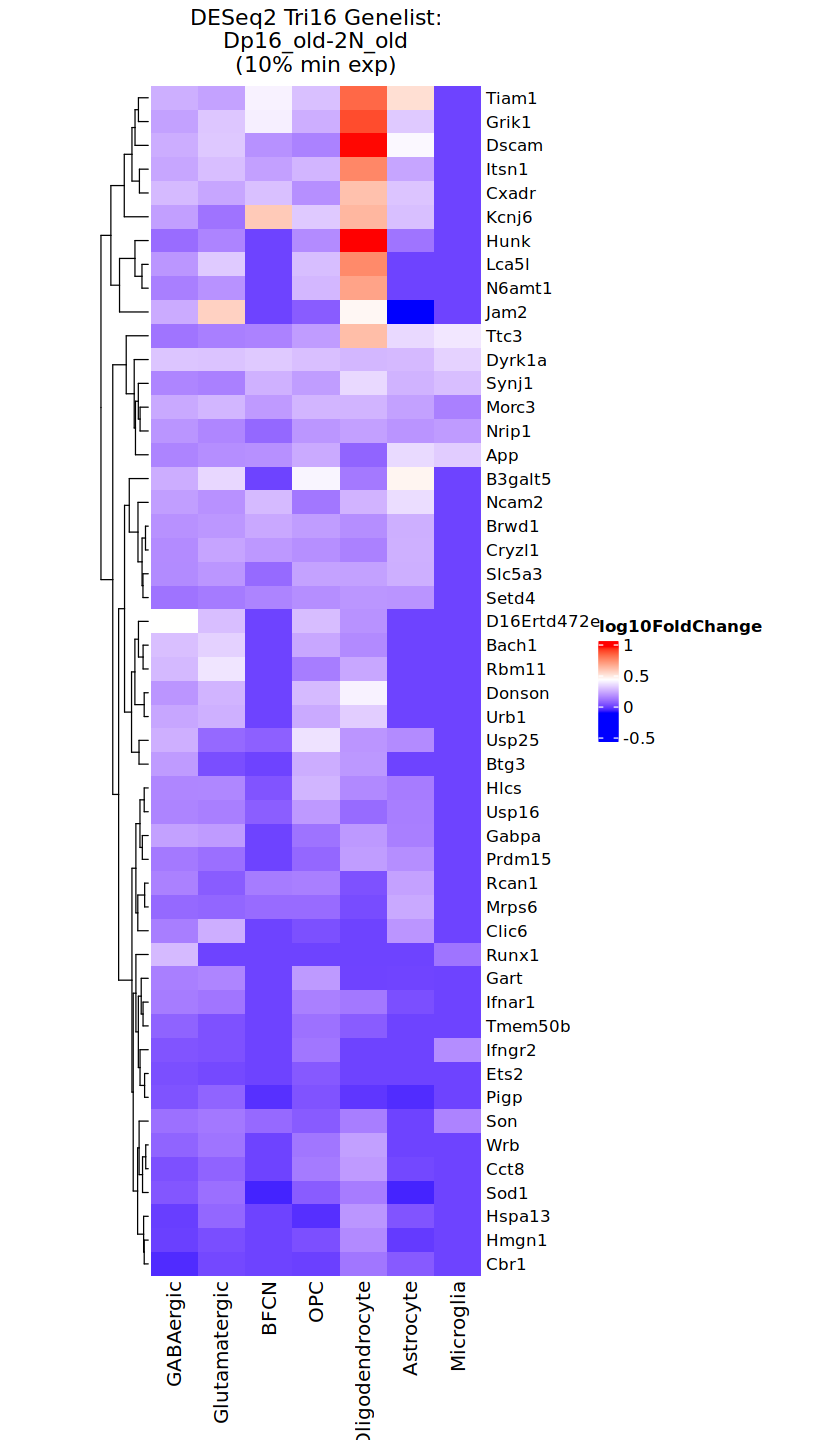

In [69]:
### LOG10FOLDCHANGE ###
plotMtx_pctexp <- plotMtx_log10[which(rownames(plotMtx_log10) %in% keepgenes),]
dim(plotMtx_pctexp)

f1 <- colorRamp2(seq(min(plotMtx_pctexp), max(plotMtx_pctexp), length = 3), c("blue", "white", "red"))
ht <- Heatmap(as.matrix(plotMtx_pctexp), name=paste0("log10FoldChange"), column_title = paste0("DESeq2 Tri16 Genelist:\n", pairwise, "\n(10% min exp)"),
              show_row_names = TRUE, row_names_side = "right", col = f1, column_order = colnames(plotMtx_pctexp),
              cluster_rows = TRUE, show_row_dend =TRUE, cluster_columns = FALSE, show_column_dend = FALSE,
              row_names_gp = gpar(fontsize = 10), width = ncol(plotMtx_pctexp)*unit(10, "mm"))
ht <- draw(ht)

[1] 50  7

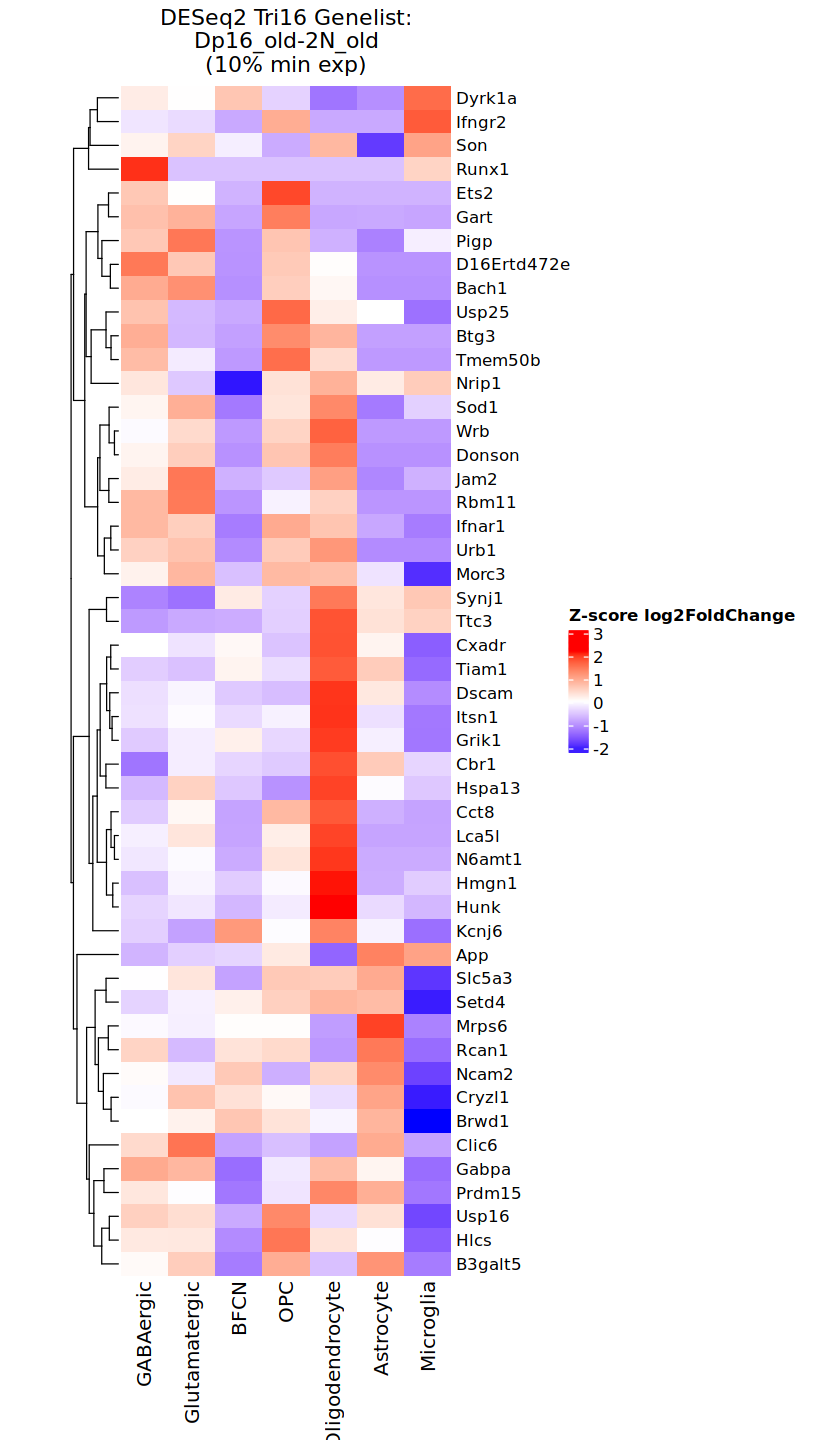

In [70]:
### ZSCORE LOG2FC ###
plotMtx_pctexp <- plotMtx_zsc[which(rownames(plotMtx_zsc) %in% keepgenes),]
dim(plotMtx_pctexp)

f1 <- colorRamp2(seq(min(plotMtx_pctexp), max(plotMtx_pctexp), length = 3), c("blue", "white", "red"))
ht <- Heatmap(as.matrix(plotMtx_pctexp), name=paste0("Z-score log2FoldChange"), column_title = paste0("DESeq2 Tri16 Genelist:\n", pairwise, "\n(10% min exp)"),
              show_row_names = TRUE, row_names_side = "right", col = f1, column_order = colnames(plotMtx_pctexp),
              cluster_rows = TRUE, show_row_dend =TRUE, cluster_columns = FALSE, show_column_dend = FALSE,
              row_names_gp = gpar(fontsize = 10), width = ncol(plotMtx_pctexp)*unit(10, "mm"))
ht <- draw(ht)

### adding in "*" for padj <= 0.05 DEGs

In [29]:
p <- "Dp16_old-Dp16_yng"

print(paste0("STARTING: ", p))

# grab all pairwise specific deseq files
deseq_files <- list.files(DE_PATH, p, full.names = T)

celltypes <- unique(sobj$broad_celltypes)
celltypes <- celltypes[!celltypes == "Doublet"] # rem doublets

# df for signif "*" in hmap
signif_df <- data.frame(matrix(0, ncol = length(celltypes), nrow = length(tri16Genes))) # contains - log2fc, padj, celltype, and signif cols
rownames(signif_df) <- tri16Genes
colnames(signif_df) <- celltypes

# try to make this tri16genes x celltype dims
plotMtx <- as.data.frame(matrix(0, ncol = length(celltypes), nrow = length(tri16Genes))) # contains - just log2fc for each celltype
rownames(plotMtx) <- tri16Genes
colnames(plotMtx) <- celltypes
for(ct in celltypes){
    print(ct)

    # grab the celltype specific deseq file and subset for tri16 genelist
    ct_deseq <- read.csv(grep(ct, deseq_files, value = T), row.names = 1)[,c("log2FoldChange","padj")]
    ct_deseq_tri16 <- ct_deseq[which(rownames(ct_deseq) %in% tri16Genes),]
    ct_deseq_tri16$Celltype <- ct
    
    ct_deseq_tri16$Signif <- ifelse(ct_deseq_tri16$padj <= 0.05, "Yes", "No")
    print(dim(ct_deseq_tri16))

    #pdata <- rbind(pdata, ct_deseq_tri16)
    signif_df[rownames(ct_deseq_tri16),ct] <- ifelse(ct_deseq_tri16$padj <= 0.05, "Yes", "No")
    
    # just adding log2fc to dataframe without padj and other cols - maybe this will work better?
    plotMtx[rownames(ct_deseq_tri16),ct] <- ct_deseq_tri16$log2FoldChange
}
print("done going through celltypes")

### done making plot data (plotMtx) - now on the plotting section ###    
# maybe remove genes that have zeros across all celltypes
#plotMtx <- plotMtx[rowSums(plotMtx) > 0, ]
#dim(plotMtx)
#head(plotMtx)
head(plotMtx)
dim(plotMtx)
head(signif_df)
dim(signif_df)
print(signif_df["Ets2",])
print(plotMtx["Ets2",])

# applying 10% min exp cutoff (for each gene @ least one ct must have 10% exp)
# TODO: do i need to apply the pct exp based on the pairwise comparison??? ex: Dp16_old v. Dp16_yng pct exp?
# TODO: something like this? pctExp <- Percent_Expressing(ct_sobj, features = tri16genes, group_by = "genotype")
pctExp <- Percent_Expressing(sobj, features = tri16Genes, group_by = "broad_celltypes")
keepgenes <- rownames(pctExp[apply(pctExp, 1, max) >= 10, ])
print("keepgenes")
print(keepgenes)
plotMtx_pctexp <- plotMtx[which(rownames(plotMtx) %in% keepgenes),]
head(plotMtx_pctexp)
rownames(plotMtx_pctexp)
print(plotMtx_pctexp["Ets2",])

# subset signif signif_df df to match plotMtx exactly
signif_df <- signif_df[which(rownames(signif_df) %in% rownames(plotMtx_pctexp)), ]
print(signif_df["Ets2",])
dim(signif_df)
head(signif_df)

[1] "STARTING: Dp16_old-Dp16_yng"
[1] "GABAergic"
[1] 76  4
[1] "Glutamatergic"
[1] 67  4
[1] "BFCN"
[1] 27  4
[1] "OPC"
[1] 35  4
[1] "Oligodendrocyte"
[1] 55  4
[1] "Astrocyte"
[1] 44  4
[1] "Microglia"
[1] 18  4
[1] "done going through celltypes"


GABAergic  Glutamatergic BFCN       OPC        Oligodendrocyte Astrocyte
Lipi    0.0000000  0.00000000    0.0000000  0.0000000  0.00000000     0.0000000
Rbm11   0.2086911  0.03074049    0.0000000  0.0000000 -0.21774837     0.0000000
Hspa13 -0.1536817 -0.09130245    0.0000000  0.0000000  0.43405623     0.2658920
Samsn1  0.5559112  0.00000000    0.0000000  0.0000000  0.00000000     0.0000000
Nrip1   0.1662311  0.23725786   -0.2332674 -0.1201510 -0.37678185     0.2372267
Usp25   0.3303855  0.20754696    0.1531498  0.4153594 -0.02298244     0.5277448
       Microglia 
Lipi   0.00000000
Rbm11  0.00000000
Hspa13 0.00000000
Samsn1 0.47601835
Nrip1  0.05470513
Usp25  0.51228537

[1] 114   7

GABAergic Glutamatergic BFCN OPC Oligodendrocyte Astrocyte Microglia
Lipi   0         0             0    0   0               0         0        
Rbm11  No        No            0    0   No              0         0        
Hspa13 No        No            0    0   No              No        0        
Samsn1 No        0             0    0   0               0         No       
Nrip1  No        No            No   No  No              No        No       
Usp25  No        No            No   No  No              No        No

[1] 114   7

     GABAergic Glutamatergic BFCN OPC Oligodendrocyte Astrocyte Microglia
Ets2       Yes            No    0   0               0        No         0
     GABAergic Glutamatergic BFCN OPC Oligodendrocyte  Astrocyte Microglia
Ets2 -0.397393     -0.290098    0   0               0 -0.4516577         0


Warning message:
“The following features were omitted as they were not found:
ℹ mmu-miR-99a, mmu-let-7c-1, mmu-miR-125b-2, Prss7, mmu-miR-155, Zfp294, Orf63,
  Gm312, Krtap16, Krtap16-7, Krtap16-4, Krtap8-2, Sfrs15, 2610039C10Rik,
  4931408A02Rik, 1110004E09Rik, 1810007M14Rik, 4930563D23Rik, mmu-miR-802,
  Dopey2, Dscr3, Mx2, 5830404H04Rik, and Zfp295”


[1] "keepgenes"
 [1] "Rbm11"       "Hspa13"      "Samsn1"      "Nrip1"       "Usp25"      
 [6] "Cxadr"       "Btg3"        "D16Ertd472e" "Ncam2"       "Jam2"       
[11] "Atp5j"       "Gabpa"       "App"         "N6amt1"      "Usp16"      
[16] "Cct8"        "Bach1"       "Grik1"       "Tiam1"       "Sod1"       
[21] "Hunk"        "Urb1"        "Synj1"       "Olig2"       "Olig1"      
[26] "Ifnar2"      "Ifnar1"      "Ifngr2"      "Tmem50b"     "Gart"       
[31] "Son"         "Donson"      "Atp5o"       "Cryzl1"      "Itsn1"      
[36] "Mrps6"       "Slc5a3"      "Rcan1"       "Clic6"       "Runx1"      
[41] "Setd4"       "Cbr1"        "Morc3"       "Hlcs"        "Pigp"       
[46] "Ttc3"        "Dyrk1a"      "Kcnj6"       "Ets2"        "Brwd1"      
[51] "Hmgn1"       "Wrb"         "Lca5l"       "B3galt5"     "Dscam"      
[56] "Prdm15"     


GABAergic  Glutamatergic BFCN        OPC        Oligodendrocyte
Rbm11   0.2086911  0.03074049    0.00000000  0.0000000 -0.21774837    
Hspa13 -0.1536817 -0.09130245    0.00000000  0.0000000  0.43405623    
Samsn1  0.5559112  0.00000000    0.00000000  0.0000000  0.00000000    
Nrip1   0.1662311  0.23725786   -0.23326744 -0.1201510 -0.37678185    
Usp25   0.3303855  0.20754696    0.15314983  0.4153594 -0.02298244    
Cxadr   0.4070433  0.45291148    0.04874068  0.2274803  1.84844040    
       Astrocyte Microglia 
Rbm11  0.0000000 0.00000000
Hspa13 0.2658920 0.00000000
Samsn1 0.0000000 0.47601835
Nrip1  0.2372267 0.05470513
Usp25  0.5277448 0.51228537
Cxadr  0.3907145 0.00000000

[1] "Rbm11"       "Hspa13"      "Samsn1"      "Nrip1"       "Usp25"      
 [6] "Cxadr"       "Btg3"        "D16Ertd472e" "Ncam2"       "Jam2"       
[11] "Atp5j"       "Gabpa"       "App"         "N6amt1"      "Usp16"      
[16] "Cct8"        "Bach1"       "Grik1"       "Tiam1"       "Sod1"       
[21] "Hunk"        "Urb1"        "Synj1"       "Olig2"       "Olig1"      
[26] "Ifnar2"      "Ifnar1"      "Ifngr2"      "Tmem50b"     "Gart"       
[31] "Son"         "Donson"      "Atp5o"       "Cryzl1"      "Itsn1"      
[36] "Mrps6"       "Slc5a3"      "Rcan1"       "Clic6"       "Runx1"      
[41] "Setd4"       "Cbr1"        "Morc3"       "Hlcs"        "Pigp"       
[46] "Ttc3"        "Dyrk1a"      "Kcnj6"       "Ets2"        "Brwd1"      
[51] "Hmgn1"       "Wrb"         "Lca5l"       "B3galt5"     "Dscam"      
[56] "Prdm15"

     GABAergic Glutamatergic BFCN OPC Oligodendrocyte  Astrocyte Microglia
Ets2 -0.397393     -0.290098    0   0               0 -0.4516577         0
     GABAergic Glutamatergic BFCN OPC Oligodendrocyte Astrocyte Microglia
Ets2       Yes            No    0   0               0        No         0


[1] 56  7

GABAergic Glutamatergic BFCN OPC Oligodendrocyte Astrocyte Microglia
Rbm11  No        No            0    0   No              0         0        
Hspa13 No        No            0    0   No              No        0        
Samsn1 No        0             0    0   0               0         No       
Nrip1  No        No            No   No  No              No        No       
Usp25  No        No            No   No  No              No        No       
Cxadr  No        No            No   No  No              No        0

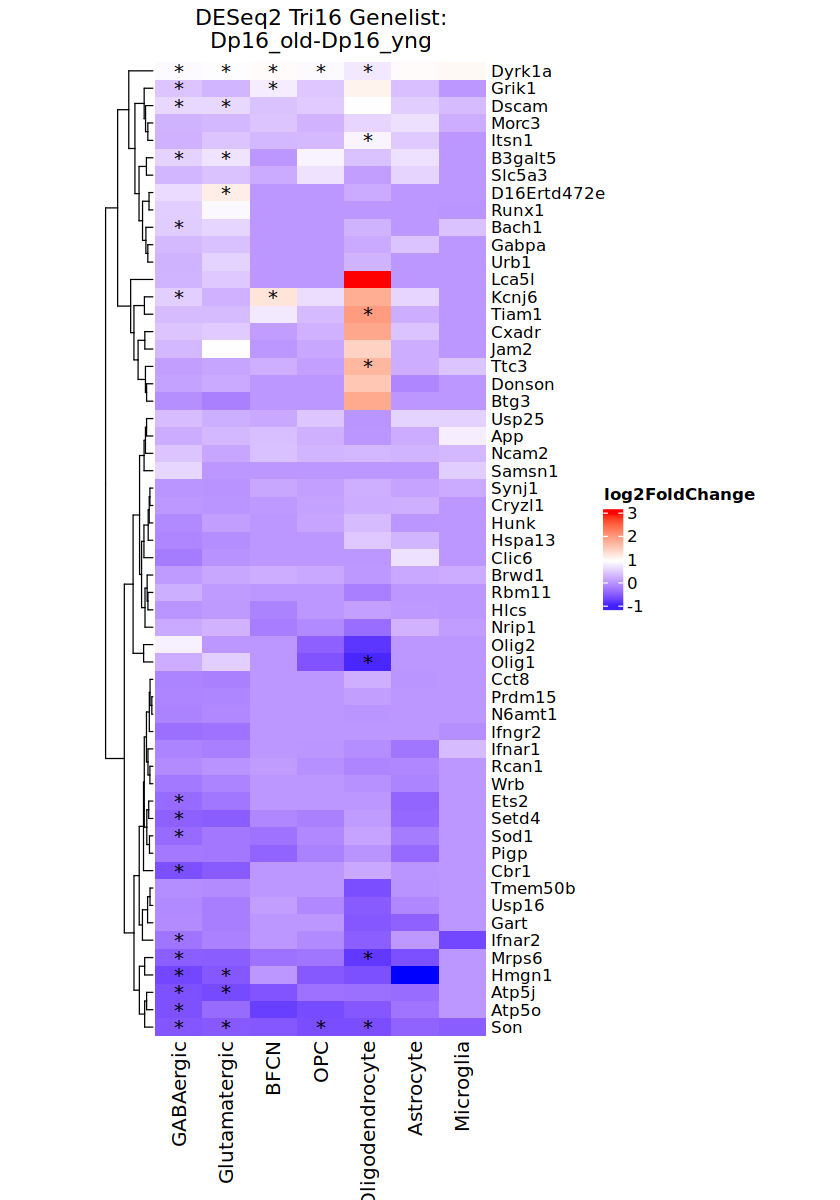

In [32]:
options(repr.plot.height = 10)

f1 <- colorRamp2(seq(min(plotMtx_pctexp), max(plotMtx_pctexp), length = 3), c("blue", "white", "red"))
ht <- Heatmap(as.matrix(plotMtx_pctexp), name="log2FoldChange", column_title = paste0("DESeq2 Tri16 Genelist:\n", p),
              show_row_names = TRUE, row_names_side = "right", col = f1, column_order = colnames(plotMtx_pctexp),
              cluster_rows = TRUE, show_row_dend = TRUE, cluster_columns = FALSE, show_column_dend = FALSE,
              row_names_gp = gpar(fontsize = 10), width = ncol(plotMtx_pctexp)*unit(10, "mm"),
                 cell_fun = function(j, i, x, y, width, height, fill){
                     if(signif_df[i,j] == "Yes"){
                         grid.text("*", x, y)
                     }
                 })

draw(ht)

# TODO: OK OK ADDING "*" WORKS; NOW I JUST NEED TO SUBSET signif_df TO MATCH plotMtx EXACTLY WITH SIGNIF COL
# basically need to make a matrix with Yes/No with exactly dims as the plotted data to i can say "psignif_dfdata[i,j] == Yes"
# ok this works but i need to make sure the right genes are being plotted - aka i can't find Ets2 which should be there for microglia
# also check that the * are placed correctly

### done testing now put it all together

In [9]:
### putting testing heatmaps in here so it doesn't overwrite the other stuff
# this directory is a remake of the log2fc tri16 hmaps - with the NA's introduced from deseq2
NA_ODIR <- "/tscc/projects/ps-epigen/users/kdang/ASAP/Aging_Figures/Aging_WWN_nodoub/generalFigures/deseq_tri16_FChmaps/includeNA/"
dir.create(NA_ODIR, showWarnings = FALSE)

In [10]:
sobj$broad_celltypes <- factor(sobj$broad_celltypes, levels = c('Astrocyte','Microglia','Oligodendrocyte','OPC','BFCN',"GABAergic","Glutamatergic","Doublet"))

In [60]:
plotHmaps <- function(hmap.df, odir, signif.df, title, pctExpThres){
    # log2fc scale
    write.csv(hmap.df, paste0(odir, "log2fc_hmap_",pctExpThres,"pctThres.csv"))
    #f1 <- colorRamp2(seq(min(hmap.df), max(hmap.df), length = 3), c("blue", "white", "red"))
    f1 <- colorRamp2(c(min(hmap.df), 0, max(hmap.df)), c("blue", "white", "red"))
    #f1 <- colorRamp2(c(-3, 0, 4), c("blue", "white", "red"))
    ht_log2 <- Heatmap(as.matrix(hmap.df), name="log2FoldChange", column_title = paste0("DESeq2 Tri16 Genelist:\n", title, "(<=",pctExpThres,"%)"),
                  show_row_names = TRUE, row_names_side = "right", col = f1, column_order = colnames(hmap.df),
                  cluster_rows = TRUE, show_row_dend =TRUE, cluster_columns = FALSE, show_column_dend = FALSE,
                  row_names_gp = gpar(fontsize = 10), width = ncol(hmap.df)*unit(10, "mm"),
                        cell_fun = function(j, i, x, y, w, h, f){
                          if(signif.df[i,j] == "Yes"){
                              gb = textGrob("*")
                              gb_w = convertWidth(grobWidth(gb), "mm")
                              gb_h = convertHeight(grobHeight(gb), "mm")
                              grid.text("*", x, y - gb_h*0.5 + gb_w*0.4)
                          }else if(signif.df[i,j] == "nd"){
                              gb = textGrob("nd")
                              gb_w = convertWidth(grobWidth(gb), "mm")
                              gb_h = convertHeight(grobHeight(gb), "mm")
                              grid.text("nd", x, y - gb_h*0.2 + gb_w*0.2, gp=gpar(fontsize=5))
                          }else if(signif.df[i,j] == "--"){
                              gb = textGrob("--")
                              gb_w = convertWidth(grobWidth(gb), "mm")
                              gb_h = convertHeight(grobHeight(gb), "mm")
                              grid.text("--", x, y - gb_h*0.2 + gb_w*0.2, gp=gpar(fontsize=5))
                          }})
    pdf(paste0(odir, "log2fc_hmap_",pctExpThres,"pctThres.pdf"), width = 8, height = 11)
    draw(ht_log2)
    dev.off()

    # make a version without nd
    #ht_log2 <- Heatmap(as.matrix(hmap.df), name="log2FoldChange", column_title = paste0("DESeq2 Tri16 Genelist:\n", title, "(<=",pctExpThres,"%)"),
    #              show_row_names = TRUE, row_names_side = "right", col = f1, column_order = colnames(hmap.df),
    #              cluster_rows = TRUE, show_row_dend =TRUE, cluster_columns = FALSE, show_column_dend = FALSE,
    #              row_names_gp = gpar(fontsize = 10), width = ncol(hmap.df)*unit(10, "mm"),
    #                    cell_fun = function(j, i, x, y, w, h, f){
    #                      if(signif.df[i,j] == "Yes"){
    #                          gb = textGrob("*")
    #                          gb_w = convertWidth(grobWidth(gb), "mm")
    #                          gb_h = convertHeight(grobHeight(gb), "mm")
    #                          grid.text("*", x, y - gb_h*0.5 + gb_w*0.4)
    #                      }})
    #pdf(paste0(odir, "log2fc_hmap_",pctExpThres,"pctThres_NOnd.pdf"), width = 8, height = 11)
    #draw(ht_log2)
    #dev.off()

    # zscore log2fc
    #plotMtx_zsc <- t(scale(t(hmap.df)))
    #write.csv(plotMtx_zsc, paste0(odir, "zsc_log2fc_hmap.csv"))
    #f1 <- colorRamp2(seq(min(plotMtx_zsc), max(plotMtx_zsc), length = 3), c("blue", "white", "red"))
    #f1 <- colorRamp2(c(min(plotMtx_zsc), 0, max(plotMtx_zsc)), c("blue", "white", "red"))
    #f1 <- colorRamp2(c(-5, 0, 4), c("blue", "white", "red"))
    #ht_zsc <- Heatmap(as.matrix(plotMtx_zsc), name="Z-score log2FoldChange", column_title = paste0("DESeq2 Tri16 Genelist:\n", title),
    #              show_row_names = TRUE, row_names_side = "right", col = f1, column_order = colnames(plotMtx_zsc),
    #              cluster_rows = TRUE, show_row_dend =TRUE, cluster_columns = FALSE, show_column_dend = FALSE,
    #              row_names_gp = gpar(fontsize = 10), width = ncol(plotMtx_zsc)*unit(10, "mm"),heatmap_legend_param = list(at = c(min(hmap.df), 0, max(hmap.df))),
    #                    cell_fun = function(j, i, x, y, w, h, f){
    #                      if(signif.df[i,j] == "Yes"){
    #                          gb = textGrob("*")
    #                          gb_w = convertWidth(grobWidth(gb), "mm")
    #                          gb_h = convertHeight(grobHeight(gb), "mm")
    #                          grid.text("*", x, y - gb_h*0.5 + gb_w*0.4)
    #                      }else if(signif.df[i,j] == "nd"){
    #                          gb = textGrob("nd")
    #                          gb_w = convertWidth(grobWidth(gb), "mm")
    #                          gb_h = convertHeight(grobHeight(gb), "mm")
    #                          grid.text("nd", x, y - gb_h*0.2 + gb_w*0.2, gp=gpar(fontsize=5))
    #                      }})
    #pdf(paste0(odir, "zsc_log2fc_hmap.pdf"), width = 8, height = 9)
    #draw(ht_zsc)
    #dev.off()

    hmap.list <- list(ht_log2)
    return(hmap.list)
}

In [57]:
### NOW LOOP THROUGH AND MAKE HMAPS FOR EACH PAIRWISE COMPARISON ###
### AKA ONE PLOT PER COMPARISON; X-AXIS = CELLTYPES ###
DefaultAssay(sobj_nodoub) <- "RNA"
Idents(sobj_nodoub) <- "conditions"

PCTEXPTHRES <- 2.5
celltypes <- unique(sobj$broad_celltypes)
celltypes <- celltypes[!celltypes == "Doublet"] 
#pairs <- c("2N_old-2N_yng", "Dp16_old-2N_old", "Dp16_old-2N_yng", "Dp16_old-Dp16_yng", "Dp16_yng-2N_old", "Dp16_yng-2N_yng")

pairs <- c("Dp16_yng-2N_yng","Dp16_old-2N_old","Dp16_old-Dp16_yng")

#pairs <- c("Dp16_old-2N_old")
for(p in pairs){
    PAIR_ODIR <- paste0(NA_ODIR, p, "/")
    suppressWarnings(dir.create(PAIR_ODIR))
    
    print(paste0("STARTING: ", p))

    # grab all pairwise specific deseq files
    deseq_files <- list.files(DE_PATH, p, full.names = T)

    # signif "*" dataframe for hmap
    signif_df <- data.frame(matrix("No", ncol = length(celltypes), nrow = length(tri16Genes))) # contains - log2fc, padj, celltype, and signif cols
    rownames(signif_df) <- tri16Genes
    colnames(signif_df) <- celltypes
        
    # try to make this tri16genes x celltype dims
    plotMtx <- as.data.frame(matrix(0, ncol = length(celltypes), nrow = length(tri16Genes))) # contains - just log2fc for each celltype
    rownames(plotMtx) <- tri16Genes
    colnames(plotMtx) <- celltypes

    pdata <- data.frame() # contains - log2fc, padj, celltype, and signif cols
    for(ct in celltypes){
        print(ct)
    
        # grab the celltype specific deseq file and subset for tri16 genelist
        ct_deseq <- read.csv(grep(ct, deseq_files, value = T), row.names = 1)[,c("log2FoldChange","padj")]
        ct_deseq_tri16 <- ct_deseq[which(rownames(ct_deseq) %in% tri16Genes),]
        print("detected")
        print(nrow(ct_deseq_tri16))
        ct_deseq_tri16$Celltype <- ct
        ct_deseq_tri16$Gene <- rownames(ct_deseq_tri16)
        print(ct_deseq_tri16$Gene)
        
        ct_deseq_tri16$Signif <- ifelse(ct_deseq_tri16$padj <= 0.05, "Yes", "No")
        #print(dim(ct_deseq_tri16))
    
        pdata <- rbind(pdata, ct_deseq_tri16)
        signif_df[rownames(ct_deseq_tri16),ct] <- ifelse(ct_deseq_tri16$padj <= 0.05, "Yes", "No")
        
        # just adding log2fc to dataframe without padj and other cols - maybe this will work better?
        plotMtx[rownames(ct_deseq_tri16),ct] <- ct_deseq_tri16$log2FoldChange

        # go through genes that are NOT detected in tri16Genes and in the signif df label as 'nd'
        nd_tri16 <- setdiff(tri16Genes, ct_deseq_tri16$Gene)
        print("not detected")
        print(length(nd_tri16))
        print(nd_tri16)
        signif_df[nd_tri16,ct] <- "nd"
    }

    print(head(signif_df))
    ### 240927 KD edit - adding back in NA's from DESeq2 ex: Il10rb has padj = NA ###
    ### write these down as "No" in significance ###
    signif_df[is.na(signif_df)] <- "No"
    print(head(signif_df))

    print("initial dims of plotMtx")
    print(dim(plotMtx))

    # print the pdata (df with signif col - can be used to "*" indicate DEG)
    write.csv(pdata, paste0(PAIR_ODIR, p, "_Tri16_DEGsummary.csv"))

    ### done making plot data (plotMtx) - now on the plotting section ###  
    # in order for a gene to pass the pct exp thres,
    # it must be in at least one condition of the pair of one celltype
    cond1 <- str_split(p, pattern = "-")[[1]][1]
    cond2 <- str_split(p, pattern = "-")[[1]][2]
    sobj_nodoub_cond <- subset(sobj_nodoub, idents = c(cond1, cond2))
    
    pctExp <- suppressWarnings(Percent_Expressing(sobj_nodoub_cond, features = tri16Genes,
                                                  group_by = "broad_celltypes", split_by = "conditions")) # 90ish genes
    pctExp <- pctExp[,sort(colnames(pctExp))]
    write.csv(pctExp, paste0(PAIR_ODIR, p, "_NO_pctExpKeptGenes.csv"))
    
    print("dimensions of pct exp matrix")
    print(dim(pctExp))
    # subset plotMtx for the genes that were detected in the Percent_Expressing function
    plotMtx <- plotMtx[(rownames(plotMtx) %in% rownames(pctExp)),]

    print("dim of plotMtx after subsetting for detected PctExp genes")
    print(dim(plotMtx))
    
    pctExp <- pctExp[apply(pctExp, 1, max) >= PCTEXPTHRES, ]
    write.csv(pctExp, paste0(PAIR_ODIR, p, "_", PCTEXPTHRES, "_pctExpKeptGenes.csv"))
    
    print(head(pctExp))
    keepgenes <- rownames(pctExp)
    print("keep genes")
    print(sort(keepgenes))
    print(length(keepgenes))

    print("subset plotMtx for passing pctExp genes")
    plotMtx_pctexp <- plotMtx[which(rownames(plotMtx) %in% keepgenes),]
    print(dim(plotMtx_pctexp))
    
    # rearrange the celltype order
    plotMtx_pctexp <- plotMtx_pctexp[,c('Astrocyte','Microglia','Oligodendrocyte','OPC','BFCN',"GABAergic","Glutamatergic")]
    #plotMtx <- plotMtx[,c('Astrocyte','Microglia','Oligodendrocyte','OPC','BFCN',"GABAergic","Glutamatergic")]
    
    # subset signif signif_df df to match plotMtx exactly
    signif_df <- signif_df[which(rownames(signif_df) %in% rownames(plotMtx_pctexp)), c('Astrocyte','Microglia','Oligodendrocyte','OPC','BFCN',"GABAergic","Glutamatergic")]
    #signif_df <- signif_df[which(rownames(signif_df) %in% rownames(plotMtx)), c('Astrocyte','Microglia','Oligodendrocyte','OPC','BFCN',"GABAergic","Glutamatergic")]

    ### go through pctExp and for the genes that pass the pct exp cutoff, add "nd" on the values that didn't pass the N% ###
    # ex: pct exp in Astrocytes Dp16_old = 5% and Dp16_yng = 7% for geneA = "nd"
    # ex: pct exp in Astrocytes Dp16_old = 11% and Dp16_yng = 7% for geneA = detected
    # going through all of the genes passed the pct exp threshold
    # and need to add "nd" if lowly detected in that specific celltype
    # ex: 5% in cond1 vs 15% in cond2 in ONE celltype = detected
    # ex: 5% in cond1 vs 2% in cond2 in ONE celltype = nd
    for(gene in keepgenes){
        for(ct in celltypes){
            cond1_pctExp <- pctExp[gene,grep(ct, colnames(pctExp), value = TRUE)][1,1]
            cond2_pctExp <- pctExp[gene,grep(ct, colnames(pctExp), value = TRUE)][1,2]
            if((max(cond1_pctExp, cond2_pctExp) <= PCTEXPTHRES) & !(signif_df[gene,ct] %in% c("Yes", "nd"))){
                signif_df[gene,ct] <- "--"
            }
        }
    }
    ### done adding "nd"
    
    # function to make heatmaps (log2FC, log10FC, z-score log2FC)
    print(dim(plotMtx_pctexp))
    print(head(plotMtx_pctexp))
    #print(dim(plotMtx))
    print(dim(signif_df))
    print(head(signif_df))
    
    #hmap_list <- plotHmaps(plotMtx_pctexp, PAIR_ODIR, signif_df, p, PCTEXPTHRES)
    print(paste0("DONE: ", p))
}

[1] "STARTING: Dp16_yng-2N_yng"
[1] "GABAergic"
[1] "detected"
[1] 76
 [1] "Rbm11"         "Hspa13"        "Samsn1"        "Nrip1"        
 [5] "Usp25"         "Cxadr"         "Btg3"          "D16Ertd472e"  
 [9] "Chodl"         "Ncam2"         "Mrpl39"        "Jam2"         
[13] "Atp5j"         "Gabpa"         "App"           "Cyyr1"        
[17] "Adamts1"       "Adamts5"       "N6amt1"        "Rwdd2b"       
[21] "Usp16"         "Cct8"          "Bach1"         "Grik1"        
[25] "Tiam1"         "Sod1"          "Hunk"          "Urb1"         
[29] "Synj1"         "4932438H23Rik" "Olig2"         "Olig1"        
[33] "Ifnar2"        "Il10rb"        "Ifnar1"        "Ifngr2"       
[37] "Tmem50b"       "Dnajc28"       "Gart"          "Son"          
[41] "Donson"        "Cryzl1"        "Itsn1"         "Atp5o"        
[45] "Mrps6"         "Slc5a3"        "Kcne2"         "Rcan1"        
[49] "Clic6"         "Runx1"         "Setd4"         "Cbr1"         
[53] "Cbr3"          "Morc3"     

### flip around hmaps: x-axis = comparisons; 7 broad celltypes * 3 plots (different way to plot logfc) = 21 pdfs
point of previous hmaps (x = celltypes): looking at which celltype is the most "affected" (has the most significant FC) by a condition; comparing celltypes to each other based on the FC of Tri16 genes  
point of these new hmaps (x = pairs): looking at which comparison/condition ("/condition" because based on the direction i can see if say Dp16_old is the driving condition in differential expression) has the most significant FC for an individual celltype; comparing pairwise comparisons against each other

### X-AXIS = COMPARISONS
FOR THE PCT EXP NEED TO COMPARE FOR JUST THAT CELLTYPE DONT NEED TO PAY ATTENTION TO THE OTHER CELLTYPES

In [63]:
### NOW LOOP THROUGH AND MAKE HMAPS FOR EACH PAIRWISE COMPARISON ###
### AKA ONE PLOT PER CELLTYPE; X-AXIS = COMPARISONS ###
DefaultAssay(sobj) <- "RNA"
PCTEXPTHRES <- 2.5
pairs <- c("2N_old-2N_yng", "Dp16_old-2N_old", "Dp16_old-2N_yng", "Dp16_old-Dp16_yng", "Dp16_yng-2N_old", "Dp16_yng-2N_yng")
#for(p in pairs){
celltypes <- unique(sobj$broad_celltypes)
celltypes <- celltypes[!celltypes == "Doublet"] # rem doublets
celltypes <- "GABAergic" # KD edit - only wanted y-scale for GABAergic neurons
for(ct in celltypes){
    PAIR_ODIR <- paste0(NA_ODIR, ct, "/")
    suppressWarnings(dir.create(PAIR_ODIR))
    
    print(paste0("STARTING: ", ct))

    # grab all pairwise specific deseq files
    deseq_files <- list.files(DE_PATH, ct, full.names = T)

    # signif "*" dataframe for hmap
    signif_df <- data.frame(matrix("No", ncol = length(pairs), nrow = length(tri16Genes))) # contains - log2fc, padj, celltype, and signif cols
    rownames(signif_df) <- tri16Genes
    colnames(signif_df) <- pairs
        
    # try to make this tri16genes x celltype dims
    plotMtx <- as.data.frame(matrix(0, ncol = length(pairs), nrow = length(tri16Genes))) # contains - just log2fc for each celltype
    rownames(plotMtx) <- tri16Genes
    colnames(plotMtx) <- pairs

    #celltypes <- unique(sobj$broad_celltypes)
    #celltypes <- celltypes[!celltypes == "Doublet"] # rem doublets
    pdata <- data.frame() # contains - log2fc, padj, celltype, and signif cols
    #pairs <- c("2N_old-2N_yng", "Dp16_old-2N_old", "Dp16_old-2N_yng", "Dp16_old-Dp16_yng", "Dp16_yng-2N_old", "Dp16_yng-2N_yng")
    for(p in pairs){
    #for(ct in celltypes){
        print(p)
    
        # grab the celltype specific deseq file and subset for tri16 genelist
        ct_deseq <- read.csv(grep(p, deseq_files, value = T), row.names = 1)[,c("log2FoldChange","padj")]
        ct_deseq_tri16 <- ct_deseq[which(rownames(ct_deseq) %in% tri16Genes),]
        ct_deseq_tri16$Celltype <- p
        ct_deseq_tri16$Gene <- rownames(ct_deseq_tri16)
        print("detected")
        print(nrow(ct_deseq_tri16))
        print(ct_deseq_tri16$Gene)
        
        ct_deseq_tri16$Signif <- ifelse(ct_deseq_tri16$padj <= 0.05, "Yes", "No")
        print(dim(ct_deseq_tri16))
    
        pdata <- rbind(pdata, ct_deseq_tri16)
        signif_df[rownames(ct_deseq_tri16),p] <- ifelse(ct_deseq_tri16$padj <= 0.05, "Yes", "No")
    
        # just adding log2fc to dataframe without padj and other cols - maybe this will work better?
        plotMtx[rownames(ct_deseq_tri16),p] <- ct_deseq_tri16$log2FoldChange

        # go through genes that are NOT detected in tri16Genes and in the signif df label as 'nd'
        nd_tri16 <- setdiff(tri16Genes, ct_deseq_tri16$Gene)
        print("not detected")
        print(length(nd_tri16))
        print(nd_tri16)

        signif_df[nd_tri16,p] <- "nd"
    }

    print(head(signif_df))
    ### 240927 KD edit - adding back in NA's from DESeq2 ex: Il10rb has padj = NA ###
    ### write these down as "No" in significance ###
    signif_df[is.na(signif_df)] <- "No"
    print(head(signif_df))
    
    # print the pdata (df with signif col - can be used to "*" indicate DEG)
    write.csv(pdata, paste0(PAIR_ODIR, ct, "_Tri16_DEGsummary.csv"))

    ### done making plot data (plotMtx) - now on the plotting section ###    
    # maybe remove genes that have zeros across all celltypes
    print(dim(plotMtx))
    plotMtx <- plotMtx[rowSums(plotMtx) != 0, ]
    print(dim(plotMtx))
    
    # applying N% min exp cutoff
    # the gene must be exp in at least N% of one of the conditions in that specific celltype
    ct_sobj <- subset(sobj, subset = broad_celltypes == ct)
    pctExp <- suppressWarnings(Percent_Expressing(ct_sobj, features = tri16Genes, group_by = "conditions"))
    write.csv(pctExp, paste0(PAIR_ODIR, ct, "_NO_pctExpKeptGenes.csv"))

    print("dimensions of pct exp matrix")
    print(dim(pctExp))
    # subset plotMtx for the genes that were detected in the Percent_Expressing function
    plotMtx <- plotMtx[(rownames(plotMtx) %in% rownames(pctExp)),]

    print("dim of plotMtx after subsetting for detected PctExp genes")
    print(dim(plotMtx))
    
    pctExp <- pctExp[apply(pctExp, 1, max) >= PCTEXPTHRES, ]
    print(head(pctExp))
    colnames(pctExp) <- c("Dp16_old","2N_old","Dp16_yng","2N_yng")
    print(head(pctExp))
    write.csv(pctExp, paste0(PAIR_ODIR, ct, "_", PCTEXPTHRES, "_pctExpKeptGenes.csv"))
    
    keepgenes <- rownames(pctExp)
    #keepgenes <- rownames(pctExp[pctExp[[ct]] >= 10,])
    print("keep genes in plotMtx_pctexp")
    print(sort(keepgenes))
    print(length(keepgenes))

    ### 240927 - problem with doing this is that it removes genes where it is lowly exp. in each comparison
    ### ex: Il10rb	1.428085685	0.598309775	1.18744239	0.672659451 --> vals = pct.exp
    ### these are all lowly expressed (< 2.5%) so instead of having "--" across the entire line, i just removed it
    ### check if this is what we want... i think we should remove genes that are lowly expressed across all pairwise comparisons
    plotMtx_pctexp <- plotMtx[which(rownames(plotMtx) %in% keepgenes),]

    # rearrange the celltype order
    #plotMtx_pctexp <- plotMtx_pctexp[,c('Astrocyte','Microglia','Oligodendrocyte','OPC','BFCN',"GABAergic","Glutamatergic")]
    
    # subset signif signif_df df to match plotMtx exactly
    signif_df <- signif_df[which(rownames(signif_df) %in% rownames(plotMtx_pctexp)),]
    print(dim(signif_df))
    print("stopping here")
    break

    ### go through pctExp and for the genes that pass the pct exp cutoff, add "--" on the values that didn't pass the N% ###
    # ex: (thres = 10%) in Astrocytes, pct exp: 2N_old = 5%, 2N_yng = 7%, Dp16_yng = 1%, Dp16_old = 8%. for geneA = "--"/low detection
    # ex: (thres = 10%) in Astrocytes, pct exp: 2N_old = 15%, 2N_yng = 7%, Dp16_yng = 11%, Dp16_old = 8%. for geneA = passed thres
    # need to add "--" if lowly detected in that conditions for that celltype
    for(gene in keepgenes){
        for(p in pairs){
            cond1 <- str_split(p, pattern = "-")[[1]][1]
            cond2 <- str_split(p, pattern = "-")[[1]][2]
            cond1_pctExp <- pctExp[gene,grep(cond1, colnames(pctExp), value = TRUE)]
            cond2_pctExp <- pctExp[gene,grep(cond2, colnames(pctExp), value = TRUE)]
            if((max(cond1_pctExp, cond2_pctExp) <= PCTEXPTHRES) & !(signif_df[gene,p] %in% c("Yes", "nd"))){
                signif_df[gene,p] <- "--"
            }
        }
    }
    ### done adding "low detected"/"--" genes
    
    # function to make heatmaps (log2FC, log10FC, z-score log2FC)
    print(head(plotMtx_pctexp))
    print(head(signif_df))
    #hmap_list <- plotHmaps(plotMtx_pctexp, PAIR_ODIR, signif_df, ct, PCTEXPTHRES)
    print(paste0("DONE: ", ct))
}

[1] "STARTING: GABAergic"
[1] "2N_old-2N_yng"
[1] "detected"
[1] 75
 [1] "Rbm11"         "Hspa13"        "Samsn1"        "Nrip1"        
 [5] "Usp25"         "Cxadr"         "Btg3"          "D16Ertd472e"  
 [9] "Chodl"         "Ncam2"         "Mrpl39"        "Jam2"         
[13] "Atp5j"         "Gabpa"         "App"           "Cyyr1"        
[17] "Adamts1"       "Adamts5"       "N6amt1"        "Rwdd2b"       
[21] "Usp16"         "Cct8"          "Bach1"         "Grik1"        
[25] "Tiam1"         "Sod1"          "Hunk"          "Urb1"         
[29] "Synj1"         "4932438H23Rik" "Olig2"         "Olig1"        
[33] "Ifnar2"        "Il10rb"        "Ifnar1"        "Ifngr2"       
[37] "Tmem50b"       "Dnajc28"       "Gart"          "Son"          
[41] "Donson"        "Cryzl1"        "Itsn1"         "Atp5o"        
[45] "Mrps6"         "Slc5a3"        "Kcne2"         "Rcan1"        
[49] "Clic6"         "Runx1"         "Setd4"         "Cbr1"         
[53] "Cbr3"          "Morc3"       

# Done with heatmaps (x-axis = celltypes and pairwise comparisons)
### now make the dotplots

In [10]:
source("/tscc/projects/ps-epigen/users/kdang/scripts/source_FunFig.R")

In [6]:
IDIR <- "/tscc/projects/ps-epigen/users/kdang/ASAP/Aging_Figures/Aging_WWN_nodoub/generalFigures/deseq_tri16_FChmaps/"

### dotplot for hmaps with x-axis = pairwise comparisons
AKA where the directories are the celltypes

In [7]:
celltypes <- unique(sobj$broad_celltypes)
celltypes <- celltypes[! celltypes %in% "Doublet"]
celltypes

for(ct in celltypes){
    print(ct)

    CT_DIR <- paste0(IDIR, ct, "/")
    hmapCSV <- list.files(CT_DIR, "log2fc.+_2.5.+.csv", full.names = T) # hardcode this to 2.5 or 5
    #print(hmapCSV)

    # grabbing the tri16 genes that were included in the pct.exp heatmap
    hmapGenes <- rownames(read.csv(hmapCSV, row.names = 1))
    #print(hmapGenes)

    ctsobj <- subset(sobj, subset = broad_celltypes == ct)
    DefaultAssay(ctsobj) <- "SCT"
    ctsobj$conditions <- factor(ctsobj$conditions, levels = c("2N_yng","Dp16_yng","2N_old","Dp16_old"))
    
    #dplot <- suppressWarnings(Clustered_DotPlot(ctsobj, hmapGenes, group.by = "conditions", cluster_ident = FALSE))# + coord_flip() + ggtitle(ct))
    dplot <- suppressWarnings(DotPlot(ctsobj, hmapGenes, group.by = "conditions") + coord_flip() + ggtitle(ct) + RotatedAxis())

    pdf(paste0(CT_DIR,gsub(".csv","_dplot.pdf",str_split(hmapCSV, pattern = "//")[[1]][2])), width = 6, height = 14)
    print(dplot)
    dev.off()    
}

[1] GABAergic       Glutamatergic   BFCN            OPC            
[5] Oligodendrocyte Astrocyte       Microglia      
8 Levels: Astrocyte Microglia Oligodendrocyte OPC BFCN ... Doublet

[1] "GABAergic"
[1] "Glutamatergic"
[1] "BFCN"
[1] "OPC"
[1] "Oligodendrocyte"
[1] "Astrocyte"
[1] "Microglia"


### dotplot for hmaps with x-axis = celltypes
AKA where the directories are the pairwise comparisons

In [40]:
sobj_nodoub$broad_celltypes <- factor(sobj_nodoub$broad_celltypes, levels = c('Astrocyte','Microglia','Oligodendrocyte','OPC','BFCN',"GABAergic","Glutamatergic"))

In [7]:
pairs <- c("2N_old-2N_yng", "Dp16_old-2N_old", "Dp16_old-2N_yng", "Dp16_old-Dp16_yng", "Dp16_yng-2N_old", "Dp16_yng-2N_yng")
for(p in pairs){
    print(p)
    cond1 <- str_split(p, pattern = "-")[[1]][1]
    cond2 <- str_split(p, pattern = "-")[[1]][2]

    PAIR_DIR <- paste0(IDIR, p, "/")
    hmapCSV <- list.files(PAIR_DIR, "log2fc.+_2.5.+.csv", full.names = T) # hardcode this to 2.5 or 5
    print(hmapCSV)

    # grabbing the tri16 genes that were included in the pct.exp heatmap
    hmapGenes <- rownames(read.csv(hmapCSV, row.names = 1))

    Idents(sobj_nodoub) <- "conditions"
    condsobj <- subset(sobj_nodoub, idents = c(cond1, cond2))
    DefaultAssay(condsobj) <- "SCT" # must be SCT
    print(unique(condsobj$conditions))
    #condsobj$broad_celltypes <- factor(condsobj$broad_celltypes, levels = c('Astrocyte','Microglia','Oligodendrocyte','OPC','BFCN','GABAergic','Glutamatergic'))

    dplot <- suppressWarnings(DotPlot(condsobj, features = hmapGenes, group.by = "ct_cond") + RotatedAxis() + coord_flip() + ggtitle(p))
    
    pdf(paste0(PAIR_DIR,gsub(".csv","_dplot.pdf",str_split(hmapCSV, pattern = "//")[[1]][2])), width = 12, height = 14)
    print(dplot)
    dev.off()

}

[1] "2N_old-2N_yng"
[1] "/tscc/projects/ps-epigen/users/kdang/ASAP/Aging_Figures/Aging_WWN_nodoub/generalFigures/deseq_tri16_FChmaps/2N_old-2N_yng//log2fc_hmap_2.5pctThres.csv"
[1] "2N_old" "2N_yng"
[1] "Dp16_old-2N_old"
[1] "/tscc/projects/ps-epigen/users/kdang/ASAP/Aging_Figures/Aging_WWN_nodoub/generalFigures/deseq_tri16_FChmaps/Dp16_old-2N_old//log2fc_hmap_2.5pctThres.csv"
[1] "Dp16_old" "2N_old"  
[1] "Dp16_old-2N_yng"
[1] "/tscc/projects/ps-epigen/users/kdang/ASAP/Aging_Figures/Aging_WWN_nodoub/generalFigures/deseq_tri16_FChmaps/Dp16_old-2N_yng//log2fc_hmap_2.5pctThres.csv"
[1] "Dp16_old" "2N_yng"  
[1] "Dp16_old-Dp16_yng"
[1] "/tscc/projects/ps-epigen/users/kdang/ASAP/Aging_Figures/Aging_WWN_nodoub/generalFigures/deseq_tri16_FChmaps/Dp16_old-Dp16_yng//log2fc_hmap_2.5pctThres.csv"
[1] "Dp16_old" "Dp16_yng"
[1] "Dp16_yng-2N_old"
[1] "/tscc/projects/ps-epigen/users/kdang/ASAP/Aging_Figures/Aging_WWN_nodoub/generalFigures/deseq_tri16_FChmaps/Dp16_yng-2N_old//log2fc_hmap_2.5pctThres.

# testing below

In [11]:
oligo <- subset(sobj, subset = broad_celltypes == "Oligodendrocyte")

In [14]:
DefaultAssay(oligo) <- "RNA"

Warning message:
“Scaling data with a low number of groups may produce misleading results”


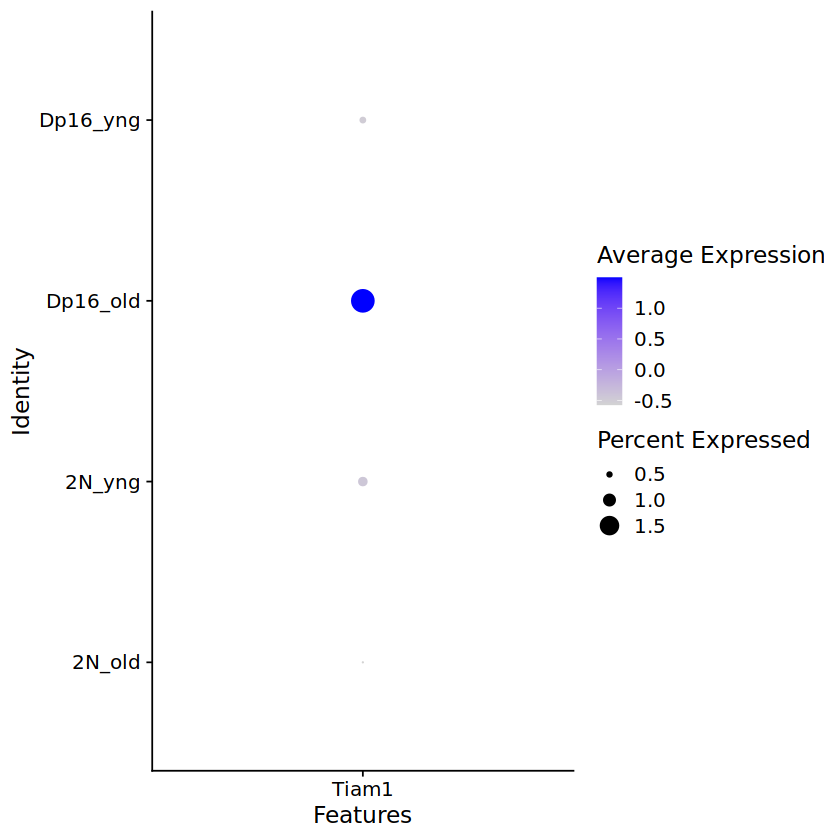

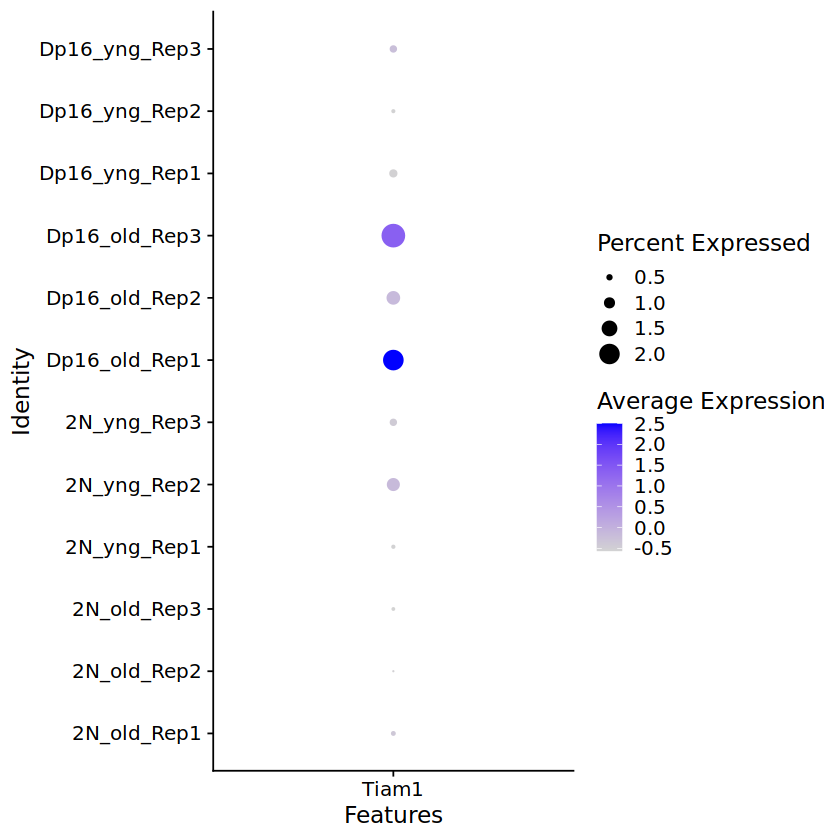

In [36]:
# comparing Dp16_old v 2N_old
oligo_dplot <- DotPlot(oligo, features = "Tiam1", group.by = "conditions", scale = T)
oligo_dplot

DotPlot(oligo, features = "Tiam1", group.by = "replicates", scale = T)

In [20]:
oligo_dplot$data

avg.exp    pct.exp   features.plot id       avg.exp.scaled
Tiam1  0.89813362 1.8149466 Tiam1         Dp16_old 0.64087110    
Tiam11 0.02973206 0.1909855 Tiam1         2N_old   0.02929863    
Tiam12 0.05341837 0.5310458 Tiam1         Dp16_yng 0.05204047    
Tiam13 0.07297884 0.7374631 Tiam1         2N_yng   0.07043874

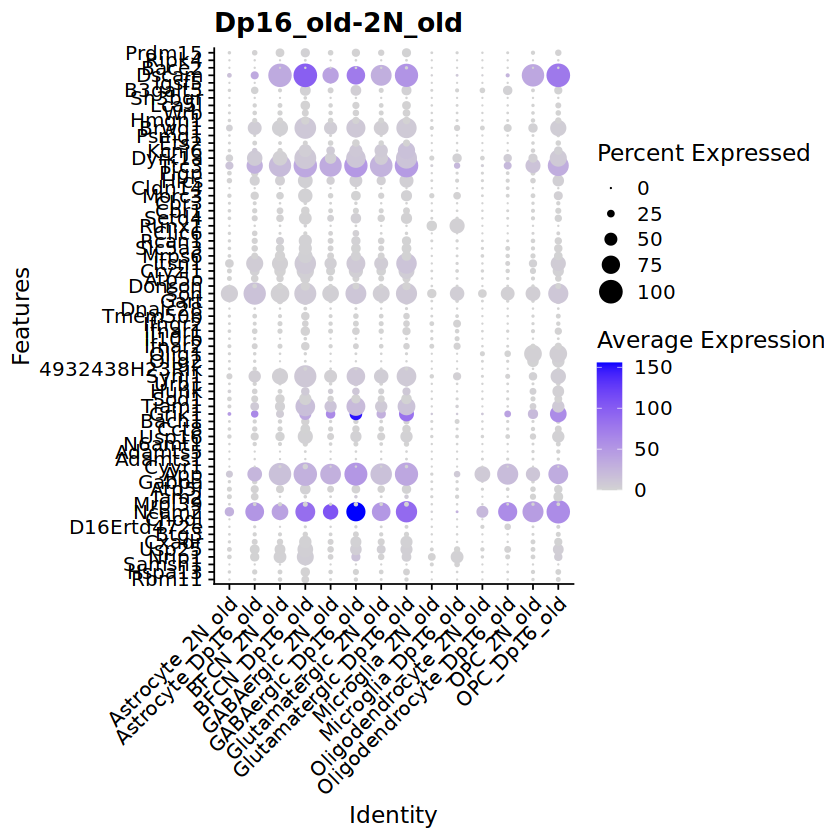

In [24]:
dplot
dplot.data <- dplot$data

In [26]:
tiam1 <- dplot.data[dplot.data$features.plot == "Tiam1",]
tiam1

avg.exp      pct.exp    features.plot id                      
Tiam1   4.886727e+08 77.6181571 Tiam1         GABAergic_Dp16_old      
Tiam11  9.611731e+05 72.4099723 Tiam1         Glutamatergic_Dp16_old  
Tiam12  3.038221e+07 81.3559322 Tiam1         BFCN_Dp16_old           
Tiam13  2.055837e+03 47.0422535 Tiam1         OPC_Dp16_old            
Tiam14  8.981336e-01  1.8149466 Tiam1         Oligodendrocyte_Dp16_old
Tiam15  1.849033e+03 30.0632911 Tiam1         Astrocyte_Dp16_old      
Tiam16  1.071990e+01  5.3639847 Tiam1         Microglia_Dp16_old      
Tiam17  2.862333e+05 46.4064019 Tiam1         GABAergic_2N_old        
Tiam18  1.449167e+03 46.9240048 Tiam1         Glutamatergic_2N_old    
Tiam19  1.073451e+01 20.9503240 Tiam1         OPC_2N_old              
Tiam110 9.295479e-01  7.8599736 Tiam1         Astrocyte_2N_old        
Tiam111 3.863828e+00 36.3636364 Tiam1         BFCN_2N_old             
Tiam112 2.973206e-02  0.1909855 Tiam1         Oligodendrocyte_2N_old  
Tiam113 4.118398e-02  0.5698006 Tiam1         Microglia_2N_old        
        avg.exp.scaled
Tiam1   20.00720355   
Tiam11  13.77591084   
Tiam12  17.22936782   
Tiam13   7.62892443   
Tiam14   0.64087110   
Tiam15   7.52295884   
Tiam16   2.46128850   
Tiam17  12.56456596   
Tiam18   7.27943409   
Tiam19   2.46253443   
Tiam110  0.65728572   
Tiam111  1.58182582   
Tiam112  0.02929863   
Tiam113  0.04035851

In [25]:
head(dplot.data)

avg.exp      pct.exp    features.plot id                 avg.exp.scaled
Rbm11  2.604465e-01  9.1720503 Rbm11         GABAergic_Dp16_old  0.2314660    
Hspa13 5.163378e-01 17.8850731 Hspa13        GABAergic_Dp16_old  0.4162981    
Samsn1 1.113509e-01  0.5015301 Samsn1        GABAergic_Dp16_old  0.1055763    
Nrip1  2.293252e+06 31.8259096 Nrip1         GABAergic_Dp16_old 14.6454820    
Usp25  7.815903e+01 43.5056103 Usp25         GABAergic_Dp16_old  4.3714589    
Cxadr  5.376255e+00 40.8364502 Cxadr         GABAergic_Dp16_old  1.8525809

In [27]:
# Dp16_old v Dp16_yng
# glut Dscam
glut <- subset(sobj, subset = broad_celltypes == "Glutamatergic")

In [37]:
DefaultAssay(glut) <- "SCT"
colnames(glut@meta.data)

[1] "orig.ident"            "nCount_RNA"            "nFeature_RNA"         
 [4] "nCount_ATAC"           "nFeature_ATAC"         "percent.mt"           
 [7] "nCount_SCT"            "nFeature_SCT"          "nCount_ATAC_COMB"     
[10] "nFeature_ATAC_COMB"    "SCT_snn_res.0.5"       "seurat_clusters"      
[13] "conditions"            "SCT_snn_res.0.05"      "TSS.enrichment"       
[16] "TSS.percentile"        "DF.classification"     "DF.scores"            
[19] "age"                   "genotype"              "blacklist_fraction"   
[22] "SCT_snn_res.1.2"       "ATAC_snn_res.1.2"      "SCT.weight"           
[25] "ATAC.weight"           "wsnn_res.1.2"          "qn.DF.scores"         
[28] "ATAC_COMB_snn_res.1.2" "ATAC_COMB.weight"      "nCount_cpeaks"        
[31] "nFeature_cpeaks"       "cpeaks_snn_res.1.2"    "cpeaks.weight"        
[34] "broad_celltypes"       "sub_celltypes"         "sub_celltypes_v2"     
[37] "frozenBatch"           "nCount_macs3_peaks"    "nFeature_macs3_peaks" 
[40] "replicates"            "ct_cond"

avg.exp  pct.exp  features.plot id            avg.exp.scaled
Dscam   7.324405 99.10714 Dscam         Dp16_old_Rep1  1.53776278   
Dscam1  6.716084 95.80420 Dscam         Dp16_old_Rep2  1.29228947   
Dscam2  6.375598 96.65072 Dscam         Dp16_old_Rep3  1.14630189   
Dscam3  3.367983 90.74844 Dscam         2N_old_Rep1   -0.54834402   
Dscam4  2.558324 80.63420 Dscam         2N_old_Rep2   -1.21152141   
Dscam5  3.347352 86.91589 Dscam         2N_old_Rep3   -0.56365930   
Dscam6  4.063063 89.83269 Dscam         Dp16_yng_Rep1 -0.07065667   
Dscam7  4.683143 94.16984 Dscam         Dp16_yng_Rep2  0.30307180   
Dscam8  5.613712 95.65217 Dscam         Dp16_yng_Rep3  0.79360285   
Dscam9  2.868941 80.78995 Dscam         2N_yng_Rep1   -0.94079518   
Dscam10 2.420161 78.79032 Dscam         2N_yng_Rep2   -1.33962666   
Dscam11 3.575182 90.51095 Dscam         2N_yng_Rep3   -0.39842554

Warning message:
“Scaling data with a low number of groups may produce misleading results”


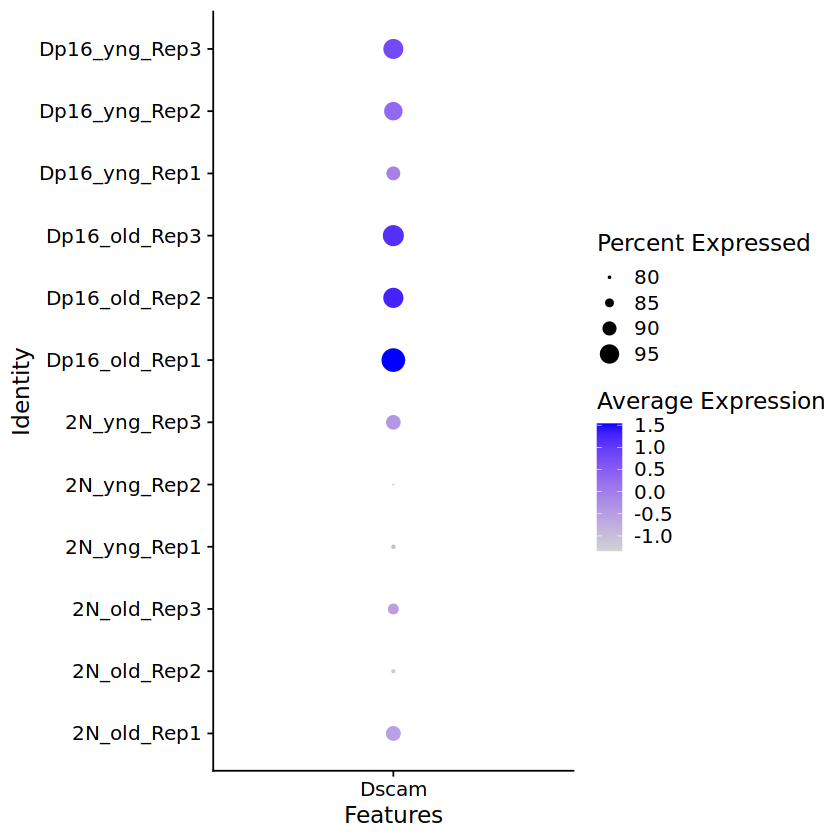

avg.exp  pct.exp  features.plot id                     avg.exp.scaled
Dscam  6.863712 97.22992 Dscam         Glutamatergic_Dp16_old  1.2739889    
Dscam1 3.075191 86.16807 Dscam         Glutamatergic_2N_old   -0.7047110    
Dscam2 4.717652 93.02218 Dscam         Glutamatergic_Dp16_yng  0.3146506    
Dscam3 2.839645 82.47381 Dscam         Glutamatergic_2N_yng   -0.8839285

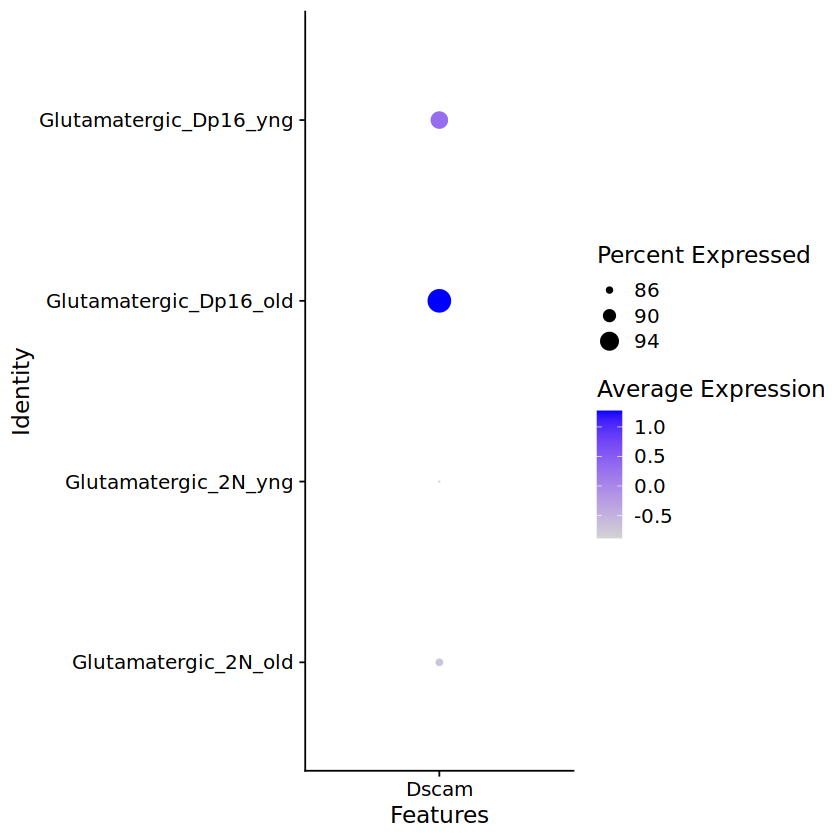

In [38]:
# WITH SCT AS ASSAY

glut_dplot <- DotPlot(glut, "Dscam", group.by = "replicates")
glut_dplot
glut_dplot$data

glut_dplot <- DotPlot(glut, "Dscam", group.by = "ct_cond")
glut_dplot
glut_dplot$data

avg.exp      pct.exp  features.plot id            avg.exp.scaled
Dscam   7.555478e+19 98.36310 Dscam         Dp16_old_Rep1  0.5316428    
Dscam1  1.598315e+23 98.18182 Dscam         Dp16_old_Rep2  0.9126588    
Dscam2  1.374820e+23 98.08612 Dscam         Dp16_old_Rep3  0.9051635    
Dscam3  3.905841e+13 94.69854 Dscam         2N_old_Rep1   -0.1886540    
Dscam4  1.736701e+04 81.76670 Dscam         2N_old_Rep2   -1.2601786    
Dscam5  1.022304e+04 82.24299 Dscam         2N_old_Rep3   -1.2865460    
Dscam6  1.016444e+11 90.47619 Dscam         Dp16_yng_Rep1 -0.4847945    
Dscam7  2.855581e+07 93.91635 Dscam         Dp16_yng_Rep2 -0.8917038    
Dscam8  1.143423e+28 97.49164 Dscam         Dp16_yng_Rep3  1.4688803    
Dscam9  1.119416e+25 93.17774 Dscam         2N_yng_Rep1    1.1240920    
Dscam10 5.678239e+17 92.90323 Dscam         2N_yng_Rep2    0.2882747    
Dscam11 2.974094e+05 88.32117 Dscam         2N_yng_Rep3   -1.1188351

Warning message:
“Scaling data with a low number of groups may produce misleading results”


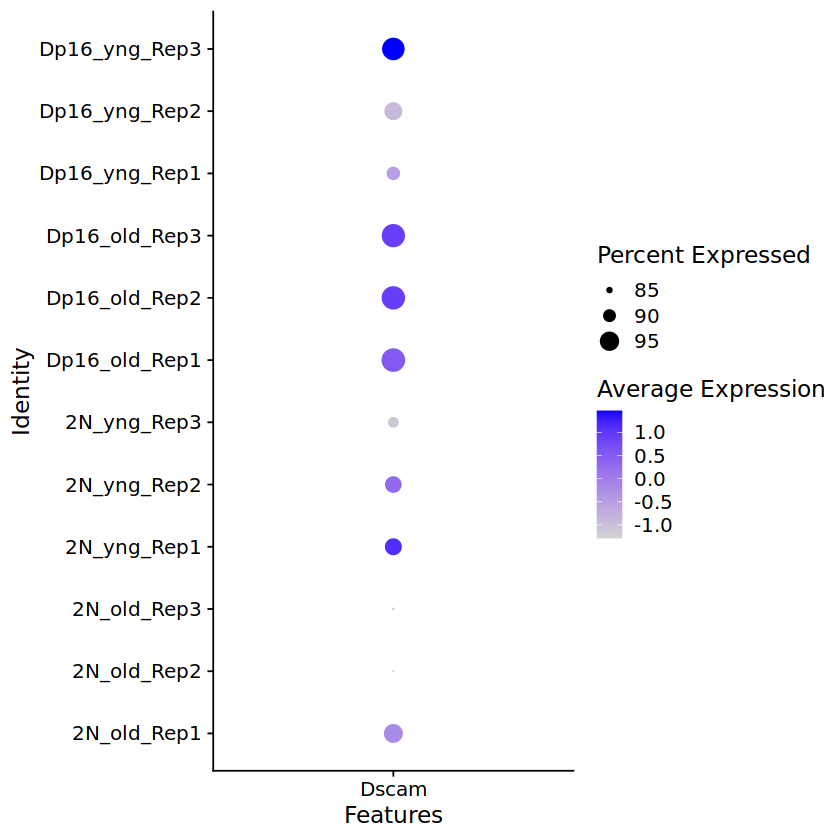

avg.exp      pct.exp  features.plot id                    
Dscam  9.517885e+22 98.22715 Dscam         Glutamatergic_Dp16_old
Dscam1 1.510824e+13 86.89184 Dscam         Glutamatergic_2N_old  
Dscam2 3.159737e+27 93.66913 Dscam         Glutamatergic_Dp16_yng
Dscam3 2.512147e+24 91.70024 Dscam         Glutamatergic_2N_yng  
       avg.exp.scaled
Dscam   0.1558852    
Dscam1 -1.4284384    
Dscam2  0.8868437    
Dscam3  0.3857095

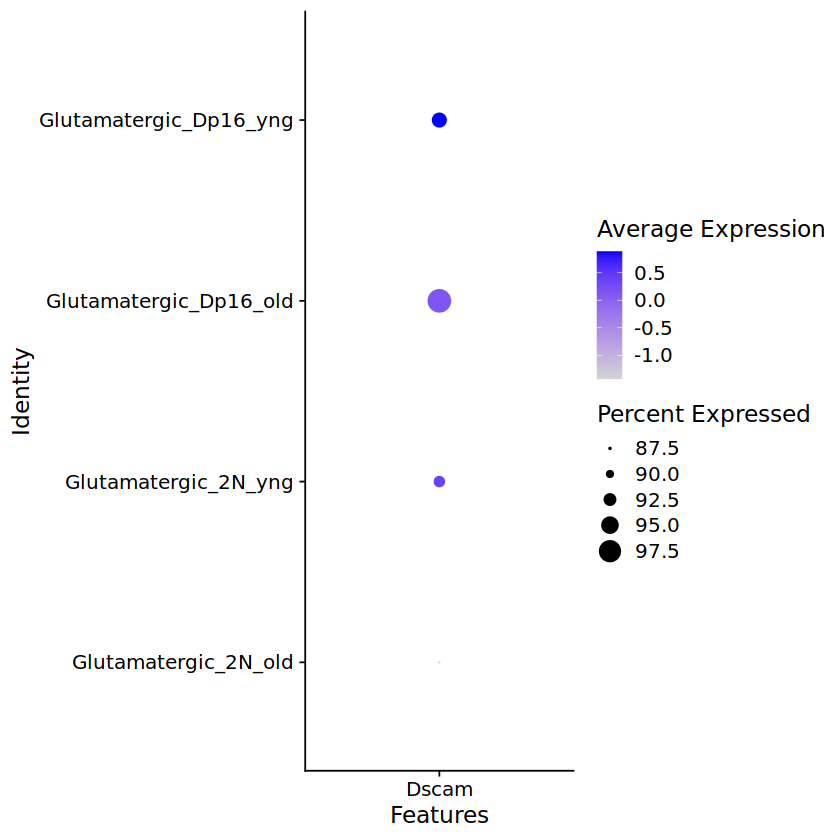

In [34]:
# WITH RNA AS ASSAY

glut_dplot <- DotPlot(glut, "Dscam", group.by = "replicates")
glut_dplot
glut_dplot$data

glut_dplot <- DotPlot(glut, "Dscam", group.by = "ct_cond")
glut_dplot
glut_dplot$data

In [ ]:
# THIS IS THE DESEQ2 OUTPUT FOR DP16_OLD V DP16_YNG
# log2FoldChange	padj	Celltype	Gene	Signif
# 0.565760343	9.30E-06	GABAergic	Dscam	Yes
# 0.573405339	0.012150718	Glutamatergic	Dscam	Yes

# slightly up-regulated for both GABA and Glut
# ~1.5FC

# OK OK I THINK I FIGURED OUT THE ISSUE
# with the scCustomize dotplots i was using the RNA assay which are the raw read counts
# deseq2 outputs normalizes the counts across the replicates
# when i make a dotplot with SCT assay that is normalized across the replicates it checks out in the Dscam Glut Dp16_old v. Dp16_yng case

Normalization: DESeq2 normalizes the counts to account for differences in sequencing depth and other systematic biases. This is done using size factors that scale the counts so that they are comparable across samples.

Dispersion Estimation: DESeq2 estimates the dispersion for each gene, which reflects the variability of counts across replicates. This step is crucial because it allows DESeq2 to model the counts accurately and account for biological variability.

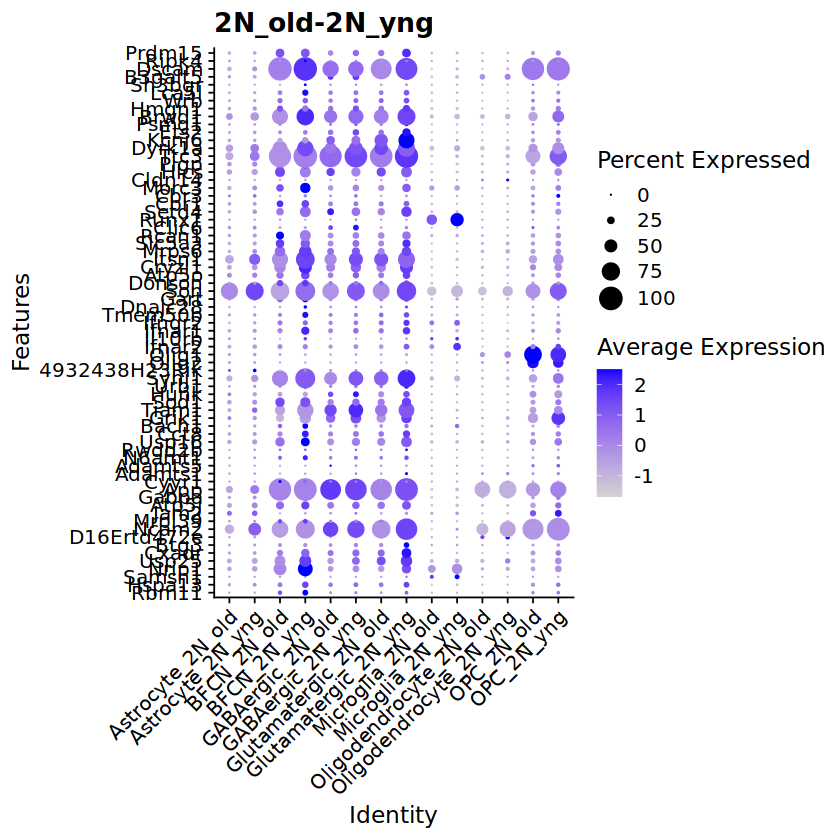

In [23]:
dplot <- DotPlot(condsobj, features = hmapGenes, group.by = "ct_cond") + RotatedAxis() + coord_flip() + ggtitle(p)
dplot

In [18]:
head(dplot$data)

avg.exp    pct.exp    features.plot id               avg.exp.scaled
Rbm11  0.07057051  3.2907038 Rbm11         GABAergic_2N_old -0.1898698    
Hspa13 0.25474080 10.3283225 Hspa13        GABAergic_2N_old  0.4708921    
Samsn1 0.01174252  0.2542817 Samsn1        GABAergic_2N_old -0.3725276    
Nrip1  1.35895002 15.8103358 Nrip1         GABAergic_2N_old -0.2987784    
Usp25  1.48396688 19.9012789 Usp25         GABAergic_2N_old -0.4301870    
Cxadr  0.78166649 17.0967018 Cxadr         GABAergic_2N_old  0.5141773

In [20]:
max(dplot$data$pct.exp)
min(dplot$data$pct.exp)

[1] 100

[1] 0

In [26]:
data <- dplot$data
max(data$pct.exp)

data[which(data$pct.exp == 100),]

[1] 100

avg.exp      pct.exp features.plot id          avg.exp.scaled
Ttc310 281833401658 100     Ttc3          BFCN_2N_yng 0.2082039